# ML Final Project

In [1]:
# Imports for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as so
import scipy.stats as ss
from IPython.display import display

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, classification_report
from IPython.display import display, Image
from functools import reduce
from xgboost import XGBClassifier
import gdown
import pydotplus
from tqdm import tqdm


from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score,auc
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


# 1 Data preprocessing

In [2]:
# Merge Data
internet_data = pd.read_csv("internet_data.csv")
display(internet_data.head())
customer_data = pd.read_csv("customer_data.csv")
display(customer_data.head())
churn_data = pd.read_csv("churn_data.csv")
display(churn_data.head())

df_temp = customer_data.merge(internet_data,how="inner",on="customerID")
display(df_temp.head())
df = df_temp.merge(churn_data,how="inner",on="customerID")
display(df.head())


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = pd.read_excel("final_data_new.xlsm")
display(df.head())
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Referred,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,PremiumTechSupport,StreamingMusic,UnlimitedData,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,Offer E,0.00,10,No,No,Yes,0.0,0,0.00
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,None,17.09,16,No,No,Yes,0.0,0,581.06
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,None,10.47,21,No,No,Yes,0.0,0,20.94
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,None,0.00,10,Yes,No,Yes,0.0,0,0.00
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,None,9.12,51,No,No,Yes,0.0,0,18.24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7042 non-null   object 
 1   gender                         7042 non-null   object 
 2   SeniorCitizen                  7042 non-null   int64  
 3   Partner                        7042 non-null   object 
 4   Dependents                     7042 non-null   object 
 5   MultipleLines                  7042 non-null   object 
 6   InternetService                7042 non-null   object 
 7   OnlineSecurity                 7042 non-null   object 
 8   OnlineBackup                   7042 non-null   object 
 9   DeviceProtection               7042 non-null   object 
 10  TechSupport                    7042 non-null   object 
 11  StreamingTV                    7042 non-null   object 
 12  StreamingMovies                7042 non-null   o

# 1.2 Data Engineering

In [4]:
df_final = df
df_final['TotalCharges'] = df_final['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
cata_cols = list(['gender','Partner', 'Dependents',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PhoneService', 'Contract', 'PaperlessBilling','PaymentMethod',
                  'Referred','PremiumTechSupport','StreamingMusic','UnlimitedData'])
for column in cata_cols:
    df_temp = pd.get_dummies(df_final[column],prefix=column)
    df_final = pd.merge(left=df_final,right=df_temp,left_index=True,right_index=True)
    df_final = df_final.drop(columns=column)

display(df_final.head())

df_final["Churn"].replace('Yes',1,inplace=True)
df_final["Churn"].replace('No',0,inplace=True)
display(df_final.head())

df_final["Offer"].replace('None',0,inplace=True)
df_final["Offer"].replace("Offer A",1,inplace=True)
df_final["Offer"].replace("Offer B",1,inplace=True)
df_final["Offer"].replace("Offer C",1,inplace=True)
df_final["Offer"].replace("Offer D",1,inplace=True)
df_final["Offer"].replace("Offer E",1,inplace=True)
display(df_final.head())

df_final.to_csv("final_data_new1.csv")

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Referred_No,Referred_Yes,PremiumTechSupport_No,PremiumTechSupport_Yes,StreamingMusic_No,StreamingMusic_Yes,UnlimitedData_No,UnlimitedData_Yes
0,7590-VHVEG,0,1,29.85,29.85,No,Offer E,0.00,10,0.0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,No,None,17.09,16,0.0,...,0,1,1,0,1,0,1,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,None,10.47,21,0.0,...,0,1,1,0,1,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,None,0.00,10,0.0,...,0,0,1,0,0,1,1,0,0,1
4,9237-HQITU,0,2,70.70,151.65,Yes,None,9.12,51,0.0,...,1,0,1,0,1,0,1,0,0,1


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Referred_No,Referred_Yes,PremiumTechSupport_No,PremiumTechSupport_Yes,StreamingMusic_No,StreamingMusic_Yes,UnlimitedData_No,UnlimitedData_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,Offer E,0.00,10,0.0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,0,None,17.09,16,0.0,...,0,1,1,0,1,0,1,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,None,10.47,21,0.0,...,0,1,1,0,1,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,None,0.00,10,0.0,...,0,0,1,0,0,1,1,0,0,1
4,9237-HQITU,0,2,70.70,151.65,1,None,9.12,51,0.0,...,1,0,1,0,1,0,1,0,0,1


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Referred_No,Referred_Yes,PremiumTechSupport_No,PremiumTechSupport_Yes,StreamingMusic_No,StreamingMusic_Yes,UnlimitedData_No,UnlimitedData_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0.00,10,0.0,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,0,0,17.09,16,0.0,...,0,1,1,0,1,0,1,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,10.47,21,0.0,...,0,1,1,0,1,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,0.00,10,0.0,...,0,0,1,0,0,1,1,0,0,1
4,9237-HQITU,0,2,70.70,151.65,1,0,9.12,51,0.0,...,1,0,1,0,1,0,1,0,0,1


In [5]:
col_name = df.columns
display(col_name)

# Check missing value in dataset and drop it
display(df_final.isnull().sum())


df_final.dropna(inplace=True)
display(df_final.isnull().sum())


#since there are no null value in the dataset, no need to drop any data.


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Referred',
       'Offer', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'PremiumTechSupport', 'StreamingMusic', 'UnlimitedData', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges'],
      dtype='object')

customerID                 0
SeniorCitizen              0
tenure                     0
MonthlyCharges             0
TotalCharges              11
                          ..
PremiumTechSupport_Yes     0
StreamingMusic_No          0
StreamingMusic_Yes         0
UnlimitedData_No           0
UnlimitedData_Yes          0
Length: 61, dtype: int64

customerID                0
SeniorCitizen             0
tenure                    0
MonthlyCharges            0
TotalCharges              0
                         ..
PremiumTechSupport_Yes    0
StreamingMusic_No         0
StreamingMusic_Yes        0
UnlimitedData_No          0
UnlimitedData_Yes         0
Length: 61, dtype: int64

# 1.3 Checking for missing value

In [6]:
#check for catagorical data and replace it

#find out which col are catagorical
cols = df.columns
display(cols)

#cata_cols = list of all catagorical data

cata_cols = list(['gender','Partner', 'Dependents',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PhoneService', 'Contract', 'PaperlessBilling','PaymentMethod',
                  'Referred','PremiumTechSupport','StreamingMusic','UnlimitedData'])

display(cata_cols)

#check uniqueness for customerID
df_final.customerID.duplicated().any()


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Referred',
       'Offer', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'PremiumTechSupport', 'StreamingMusic', 'UnlimitedData', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges'],
      dtype='object')

['gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Referred',
 'PremiumTechSupport',
 'StreamingMusic',
 'UnlimitedData']

False

# 1.4 Check class balanced

In [7]:
# for each catagorical var, check to see how many classes it has
# there many be some miss speeling error and we need to correct it.
n = len(cols)

#check to see if there any wrong type that do not belong to the correct class

cata_cols = list(['gender','Partner', 'Dependents',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PhoneService', 'Contract', 'PaperlessBilling','PaymentMethod',
                  'Referred','PremiumTechSupport','StreamingMusic','UnlimitedData'])

for i in range(0,n):
    if (cols[i] in cata_cols):
        df2 = df.iloc[:,i]
        display(df2.value_counts())
        

Male      3554
Female    3488
Name: gender, dtype: int64

No     3640
Yes    3402
Name: Partner, dtype: int64

No     4932
Yes    2110
Name: Dependents, dtype: int64

No                  3389
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2421
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2043
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2706
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2731
No internet service    1526
Name: StreamingMovies, dtype: int64

Yes    6360
No      682
Name: PhoneService, dtype: int64

Month-to-month    3875
Two year          1694
One year          1473
Name: Contract, dtype: int64

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1543
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

No     3820
Yes    3222
Name: Referred, dtype: int64

No     4999
Yes    2043
Name: PremiumTechSupport, dtype: int64

No     4555
Yes    2487
Name: StreamingMusic, dtype: int64

Yes    4744
No     2298
Name: UnlimitedData, dtype: int64

# Output Analysis

0    5162
1    1869
Name: Churn, dtype: int64

col_0  Churn  count  percent(%)
0          0   5162       73.42
1          1   1869       26.58


([<matplotlib.patches.Wedge at 0x7f8063bbad90>,
 [Text(-1.0067272439935233, 1.1119803308517668, 'Not Churn'),
  Text(1.006727243993523, -1.111980330851767, 'Churn')],
 [Text(-0.8053817951948186, 0.8895842646814135, '73%'),
  Text(0.8053817951948185, -0.8895842646814137, '27%')])

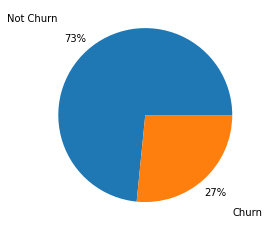

In [8]:
def get_percent(value, total, round_number = 2):
    return round(100 * value / total, round_number)
def frequency_table(df,with_percent=True, with_margins=False):
    freq_df = pd.crosstab(index=df, columns="count", margins=with_margins).reset_index()
    if with_percent:
        freq_df['percent(%)'] = get_percent(freq_df['count'] , df.shape[0])
    print(freq_df)
    
# response balanced
display(df_final.Churn.value_counts())
# the output is not balanced

frequency_table(df_final.Churn)

sizes = [73.42,26.58]
labels = ["Not Churn","Churn"]
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.5)


# 1.5 Variable Distribution Function

In [9]:
def get_percent(value, total, round_number = 2):
    return round(100 * value / total, round_number)

def frequency_table(df,with_percent=True, with_margins=False):
    freq_df = pd.crosstab(index=df, columns="count", margins=with_margins).reset_index()
    if with_percent:
        freq_df['percent(%)'] = get_percent(freq_df['count'] , df.shape[0])
    print(freq_df)

def category_plot(df_src, df_by, h_v='h'):
    frequency_table(df_src)
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[1] = sns.countplot(x=df_src, hue=df_by, ax=ax[1])
    ax[1].set(xlabel=df_src.name, ylabel=df_by.name, title = df_src.name + ' vs ' + df_by.name + ' plot')
    values = df_src.value_counts(normalize=True)* 100
    ax[0] = sns.countplot(x=df_src,ax=ax[0])
    ax[0].set(xlabel=df_src.name, ylabel = 'Count', title= 'Frequency Plot')
    if(h_v == 'v'):
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
        
    plt.show()



# Demographic Characteristics

Demographic Characteristics Analysis for VAR gender
col_0  gender  count  percent(%)
0      Female   3488       49.53
1        Male   3554       50.47


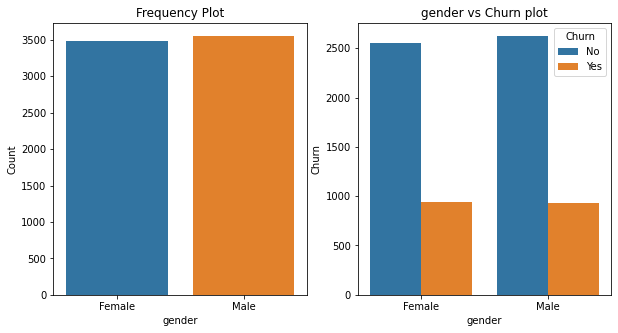

Demographic Characteristics Analysis for VAR Partner
col_0 Partner  count  percent(%)
0          No   3640       51.69
1         Yes   3402       48.31


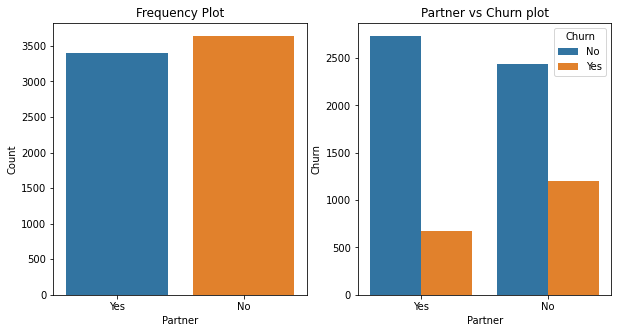

Demographic Characteristics Analysis for VAR Dependents
col_0 Dependents  count  percent(%)
0             No   4932       70.04
1            Yes   2110       29.96


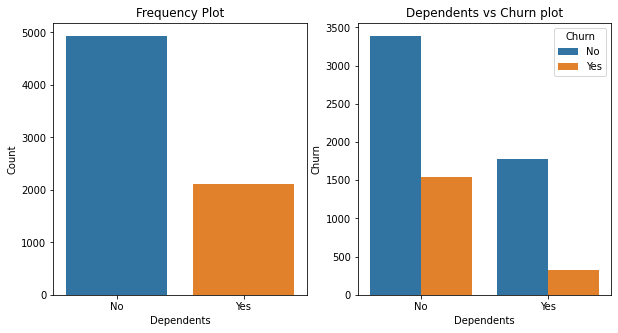

Demographic Characteristics Analysis for VAR MultipleLines
col_0     MultipleLines  count  percent(%)
0                    No   3389       48.13
1      No phone service    682        9.68
2                   Yes   2971       42.19


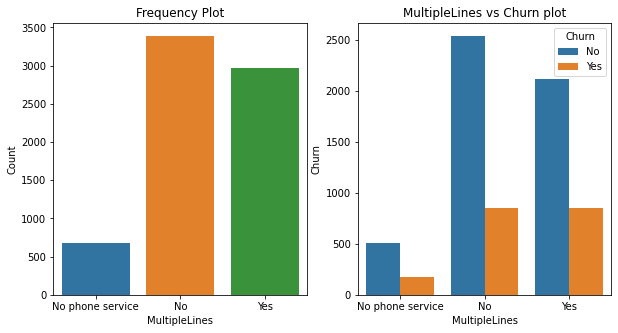

Demographic Characteristics Analysis for VAR InternetService
col_0 InternetService  count  percent(%)
0                 DSL   2421       34.38
1         Fiber optic   3095       43.95
2                  No   1526       21.67


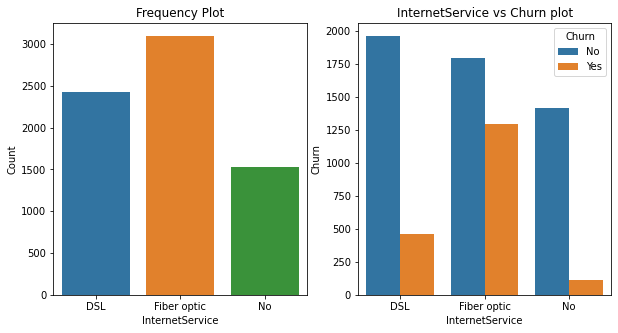

Demographic Characteristics Analysis for VAR OnlineSecurity
col_0       OnlineSecurity  count  percent(%)
0                       No   3498       49.67
1      No internet service   1526       21.67
2                      Yes   2018       28.66


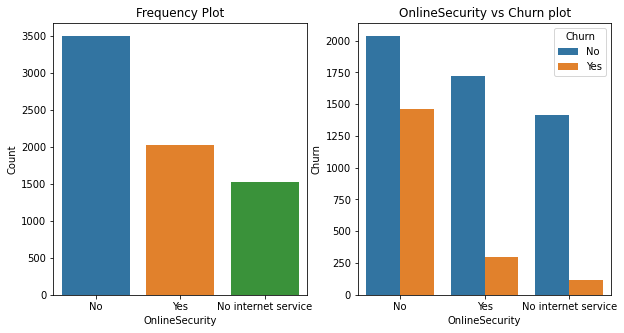

Demographic Characteristics Analysis for VAR OnlineBackup
col_0         OnlineBackup  count  percent(%)
0                       No   3087       43.84
1      No internet service   1526       21.67
2                      Yes   2429       34.49


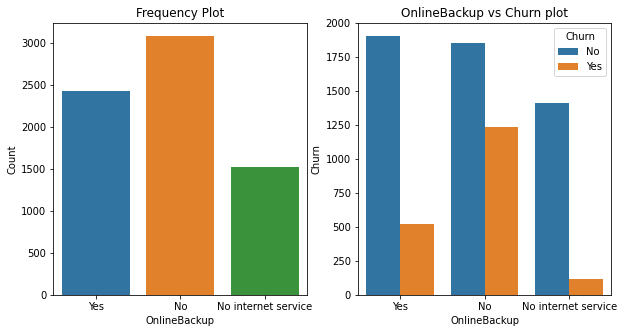

Demographic Characteristics Analysis for VAR DeviceProtection
col_0     DeviceProtection  count  percent(%)
0                       No   3095       43.95
1      No internet service   1526       21.67
2                      Yes   2421       34.38


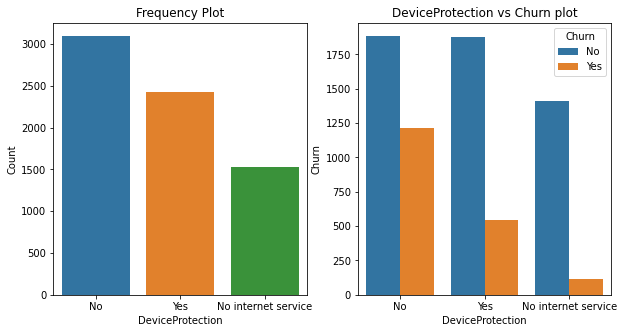

Demographic Characteristics Analysis for VAR TechSupport
col_0          TechSupport  count  percent(%)
0                       No   3473       49.32
1      No internet service   1526       21.67
2                      Yes   2043       29.01


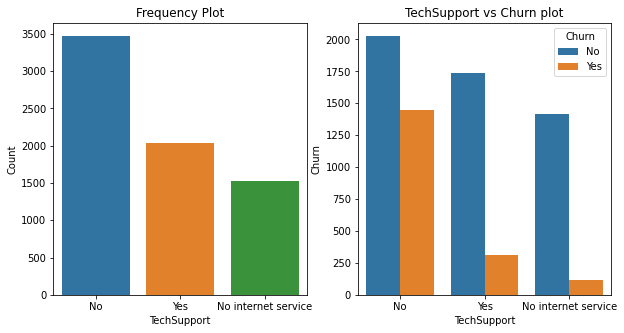

Demographic Characteristics Analysis for VAR StreamingTV
col_0          StreamingTV  count  percent(%)
0                       No   2810       39.90
1      No internet service   1526       21.67
2                      Yes   2706       38.43


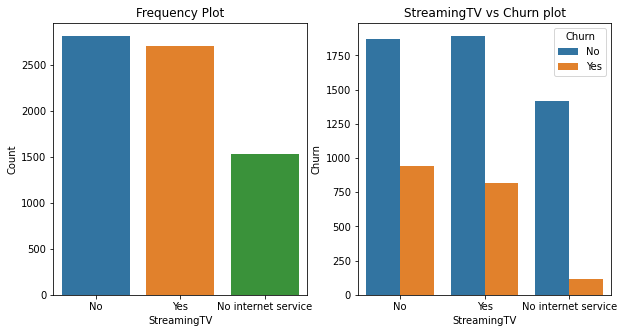

Demographic Characteristics Analysis for VAR StreamingMovies
col_0      StreamingMovies  count  percent(%)
0                       No   2785       39.55
1      No internet service   1526       21.67
2                      Yes   2731       38.78


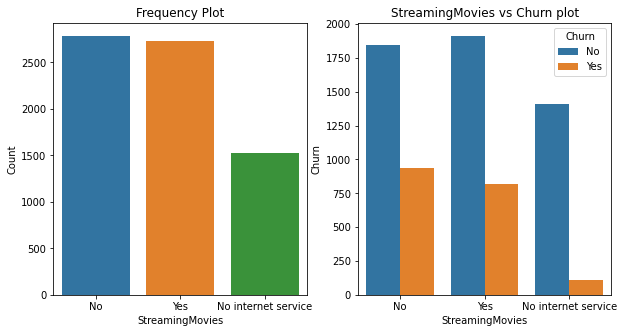

Demographic Characteristics Analysis for VAR PhoneService
col_0 PhoneService  count  percent(%)
0               No    682        9.68
1              Yes   6360       90.32


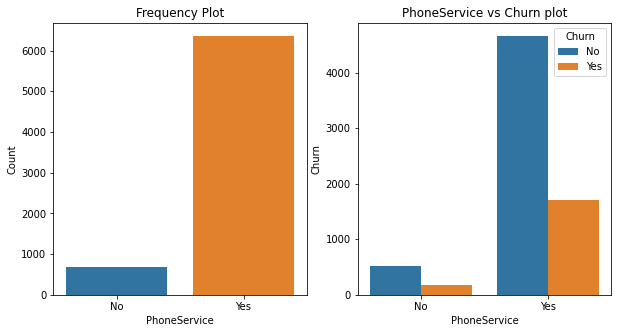

Demographic Characteristics Analysis for VAR Contract
col_0        Contract  count  percent(%)
0      Month-to-month   3875       55.03
1            One year   1473       20.92
2            Two year   1694       24.06


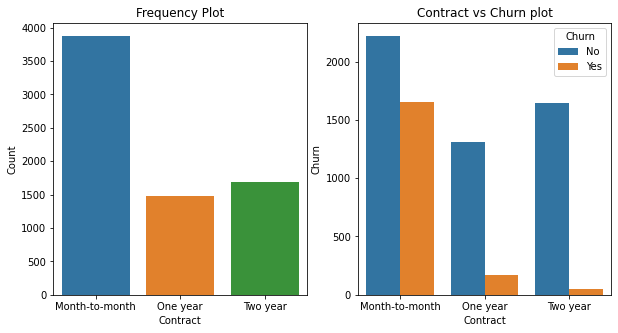

Demographic Characteristics Analysis for VAR PaperlessBilling
col_0 PaperlessBilling  count  percent(%)
0                   No   2872       40.78
1                  Yes   4170       59.22


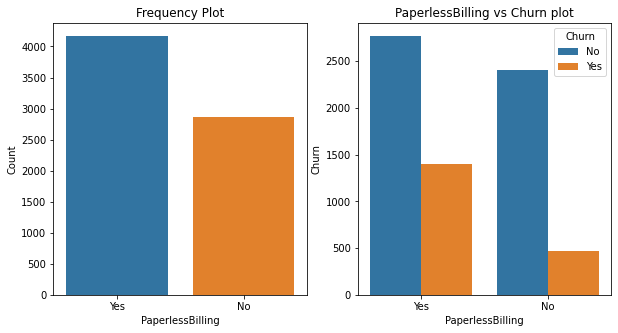

Demographic Characteristics Analysis for VAR PaymentMethod
col_0              PaymentMethod  count  percent(%)
0      Bank transfer (automatic)   1543       21.91
1        Credit card (automatic)   1522       21.61
2               Electronic check   2365       33.58
3                   Mailed check   1612       22.89


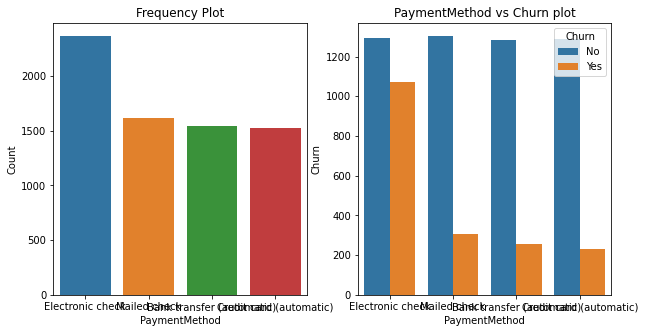

Demographic Characteristics Analysis for VAR Referred
col_0 Referred  count  percent(%)
0           No   3820       54.25
1          Yes   3222       45.75


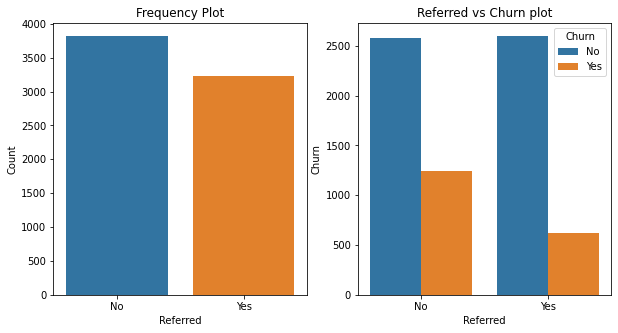

Demographic Characteristics Analysis for VAR PremiumTechSupport
col_0 PremiumTechSupport  count  percent(%)
0                     No   4999       70.99
1                    Yes   2043       29.01


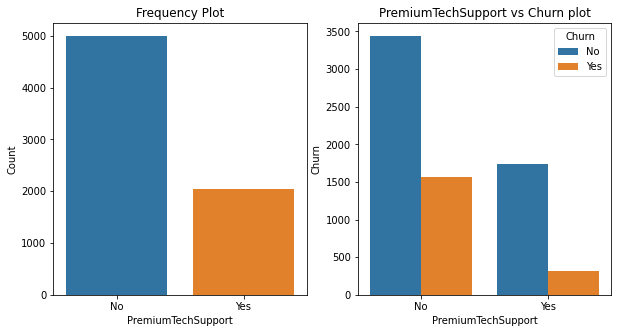

Demographic Characteristics Analysis for VAR StreamingMusic
col_0 StreamingMusic  count  percent(%)
0                 No   4555       64.68
1                Yes   2487       35.32


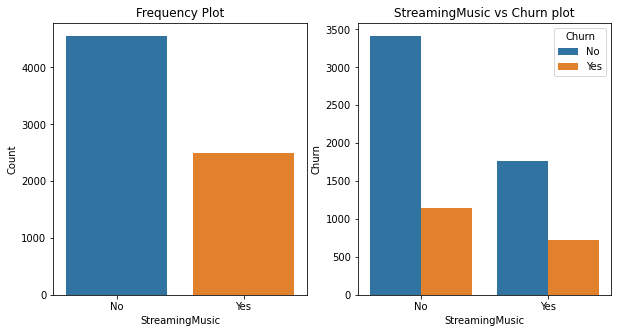

Demographic Characteristics Analysis for VAR UnlimitedData
col_0 UnlimitedData  count  percent(%)
0                No   2298       32.63
1               Yes   4744       67.37


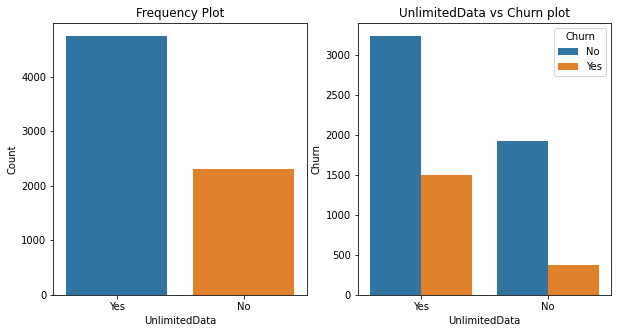

In [10]:
cata_cols = list(['gender','Partner', 'Dependents',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PhoneService', 'Contract', 'PaperlessBilling','PaymentMethod',
                    'Referred','PremiumTechSupport','StreamingMusic','UnlimitedData'])


for i in range(0,len(cata_cols)):
    print(f"Demographic Characteristics Analysis for VAR {cata_cols[i]}")
    category_plot(df.loc[:,cata_cols[i]], df.Churn)


# 1.6 data splitting


In [11]:
#check class balanced:
display(df_final.Churn.value_counts())
#the class is unblanced and with 2 levels

X = df_final.drop(["Churn","customerID"],axis = 'columns')
y = df_final.Churn


#test and split data

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
display(Xtrain.shape)
display(ytrain.shape)


0    5162
1    1869
Name: Churn, dtype: int64

(4921, 59)

(4921,)

In [12]:
# to deal with imblance data, we randomly selected a balanced train set
X = df_final.drop(["Churn","customerID"],axis = 'columns')
y = df_final.Churn


#test and split data

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
train = pd.concat([Xtrain,ytrain],axis=1)
train_maj = train[train.Churn==0]
train_min = train[train.Churn==1]
display(train_maj.Churn.value_counts())
display(train_min.Churn.value_counts())

import random

from sklearn.utils import resample
train_maj_sampled = resample(train_maj, replace=False,n_samples=1315,random_state=0)
display(train_maj_sampled.Churn.value_counts())

train_sampled = pd.concat([train_maj_sampled,train_min],axis=0)
display(train_sampled.Churn.value_counts())

Xtrain_sampled = train_sampled.drop(["Churn"],axis=1)
ytrain_sampled = train_sampled.Churn

display(Xtrain_sampled)
display(ytrain_sampled)
Xtest_sampled = Xtest
ytest_sampled = ytest

display(Xtest_sampled)


0    3606
Name: Churn, dtype: int64

1    1315
Name: Churn, dtype: int64

0    1315
Name: Churn, dtype: int64

0    1315
1    1315
Name: Churn, dtype: int64

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Referred_No,Referred_Yes,PremiumTechSupport_No,PremiumTechSupport_Yes,StreamingMusic_No,StreamingMusic_Yes,UnlimitedData_No,UnlimitedData_Yes
1397,0,4,82.85,319.60,1,19.84,73,0.00,0,79.36,...,0,0,1,0,1,0,0,1,0,1
1826,0,65,90.65,5931.00,1,19.84,2,0.00,110,1289.60,...,1,0,0,1,1,0,0,1,1,0
2495,0,38,20.25,814.75,1,10.54,0,0.00,0,400.52,...,0,0,0,1,1,0,1,0,1,0
3926,0,11,34.70,383.55,1,0.00,22,22.53,150,0.00,...,0,1,1,0,1,0,1,0,1,0
6807,0,6,20.40,107.60,0,41.36,0,0.00,0,248.16,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,1,7,74.40,527.90,0,8.92,17,32.46,0,62.44,...,0,1,0,1,1,0,1,0,0,1
2140,0,33,86.15,2745.70,0,14.34,28,0.00,0,473.22,...,0,0,0,1,1,0,0,1,0,1
5933,1,3,105.00,294.45,1,35.43,18,0.00,0,106.29,...,1,0,1,0,1,0,1,0,0,1
4381,1,49,90.85,4515.85,1,44.88,15,0.00,0,2199.12,...,0,0,1,0,1,0,1,0,0,1


1397    0
1826    0
2495    0
3926    0
6807    0
       ..
2168    1
2140    1
5933    1
4381    1
1658    1
Name: Churn, Length: 2630, dtype: int64

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Offer,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Referred_No,Referred_Yes,PremiumTechSupport_No,PremiumTechSupport_Yes,StreamingMusic_No,StreamingMusic_Yes,UnlimitedData_No,UnlimitedData_Yes
5561,0,1,20.65,20.65,1,1.47,0,0.0,0,1.47,...,1,0,1,0,1,0,1,0,1,0
5814,0,16,20.60,330.25,1,33.44,0,0.0,0,535.04,...,0,0,1,0,1,0,1,0,1,0
2645,0,1,19.80,19.80,0,11.96,0,0.0,0,11.96,...,0,0,1,0,1,0,1,0,1,0
3983,0,1,24.25,24.25,1,0.00,7,0.0,0,0.00,...,1,0,1,0,1,0,1,0,0,1
6438,1,1,74.40,74.40,1,11.08,12,0.0,0,11.08,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,33,19.45,600.25,0,5.86,0,0.0,0,193.38,...,0,0,0,1,1,0,1,0,1,0
2687,0,28,91.00,2626.15,0,45.24,59,0.0,0,1266.72,...,1,0,1,0,0,1,0,1,0,1
5843,1,35,81.60,2815.25,0,4.16,28,0.0,0,145.60,...,0,0,0,1,1,0,1,0,0,1
3576,0,72,23.30,1623.15,0,18.14,0,0.0,0,1306.08,...,0,0,0,1,1,0,1,0,1,0


In [13]:
def compute_performance(ytest,yhat, classes):
    l = np.zeros(5)
    conf = confusion_matrix(ytest,yhat)
    tn = conf[0,0]
    fn = conf[1,0]
    fp = conf[0,1]
    tp = conf[1,1]
    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    acc = (tp + tn) / (tp + tn + fp + fn)
    l[0] = acc
    
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    l[1] = precision
    
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    sensitivity = recall
    l[2] = sensitivity
    
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    l[3] = specificity
    #f1-score
    f1_score = 2*(precision*recall)/(precision+recall)
    l[4] = f1_score
        
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3), "f1-score:",round(f1_score,3))
    return l


# Dummy Classifier

tp: 147 tn: 1125 fp: 431 fn: 407
Accuracy: 0.603 Recall: 0.265 Precision: 0.254 Sensitivity: 0.265 Specificity: 0.723 f1-score: 0.26


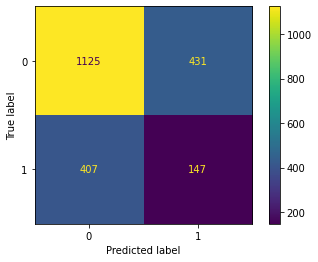

In [14]:
#dummy classifier
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier(strategy="stratified")
model_dummy.fit(Xtrain,ytrain)
ypred_dummy = model_dummy.predict(Xtest)
yprob_dummy = model_dummy.predict_proba(Xtest)
cp_dummy = compute_performance(ytest,ypred_dummy,model_dummy.classes_)
#print(compute_performance(ytest,ypred_dummy,model_dummy.classes_))
conf_dummy = confusion_matrix(ytest,ypred_dummy)
ConfusionMatrixDisplay(conf_dummy).plot()

#print(classification_report(ytest,ypred_dummy))

fpr_dummy, tpr_dummy, _ = roc_curve(ytest, yprob_dummy[:,1], pos_label=1)
auc_dummy = np.round(roc_auc_score(y_true = ytest, y_score = yprob_dummy[:,1]), decimals = 3)

tp: 272 tn: 793 fp: 763 fn: 282
Accuracy: 0.505 Recall: 0.491 Precision: 0.263 Sensitivity: 0.491 Specificity: 0.51 f1-score: 0.342


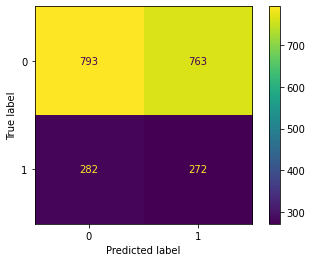

In [15]:
#dummy model with weight
model_dummy_w = DummyClassifier(strategy="stratified")
model_dummy_w.fit(Xtrain_sampled,ytrain_sampled)
ypred_dummy_w = model_dummy_w.predict(Xtest)
yprob_dummy_w = model_dummy_w.predict_proba(Xtest)
cp_dummy_w = compute_performance(ytest,ypred_dummy_w,model_dummy_w.classes_)
#print(compute_performance(ytest,ypred_dummy_w,model_dummy_w.classes_))
conf_dummy_w = confusion_matrix(ytest,ypred_dummy_w)
ConfusionMatrixDisplay(conf_dummy_w).plot()

#print(classification_report(ytest,ypred_dummy))

fpr_dummy_w, tpr_dummy_w, _ = roc_curve(ytest, yprob_dummy_w[:,1], pos_label=1)
auc_dummy_w = np.round(roc_auc_score(y_true = ytest, y_score = yprob_dummy_w[:,1]), decimals = 3)

[1 0 0 ... 0 1 0]
tp: 133 tn: 1139 fp: 417 fn: 421
Accuracy: 0.603 Recall: 0.24 Precision: 0.242 Sensitivity: 0.24 Specificity: 0.732 f1-score: 0.241
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1556
           1       0.24      0.24      0.24       554

    accuracy                           0.60      2110
   macro avg       0.49      0.49      0.49      2110
weighted avg       0.60      0.60      0.60      2110



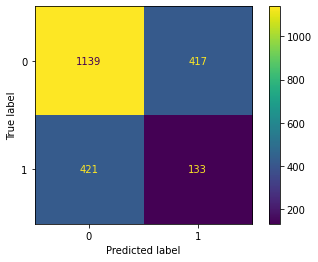

In [16]:
#dummy model with scaling
model_dummy_s = Pipeline([
    ('scl_d_s', StandardScaler()),
    ('d_s', DummyClassifier(strategy="stratified"))
])

#print(f"Intercept {lr_s.intercept_} \n Parameters:{lr_s.coef_}")

#predictions
ypred_dummy_s = model_dummy_s.fit(Xtrain,ytrain).predict(Xtest)
print(ypred_dummy_s)
yprob_dummy_s = model_dummy_s.predict_proba(Xtest)
cp_dummy_s = compute_performance(ytest,ypred_dummy_s,model_dummy_s.classes_)
#print(compute_performance(ytest,ypred_lr_s,lr_s.classes_))
conf_dummy_s = confusion_matrix(ytest,ypred_dummy_s)
ConfusionMatrixDisplay(conf_dummy_s).plot()

print(classification_report(ytest,ypred_dummy_s))

fpr_dummy_s, tpr_dummy_s, _ = roc_curve(ytest, yprob_dummy_s[:,1], pos_label=1)
auc_dummy_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_dummy_s[:,1]), decimals = 3)

[1 0 0 ... 0 0 1]
tp: 288 tn: 789 fp: 767 fn: 266
Accuracy: 0.51 Recall: 0.52 Precision: 0.273 Sensitivity: 0.52 Specificity: 0.507 f1-score: 0.358
              precision    recall  f1-score   support

           0       0.75      0.51      0.60      1556
           1       0.27      0.52      0.36       554

    accuracy                           0.51      2110
   macro avg       0.51      0.51      0.48      2110
weighted avg       0.62      0.51      0.54      2110



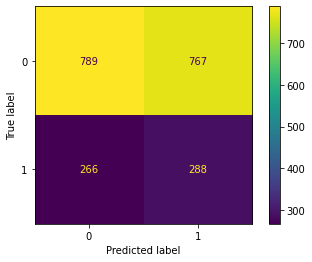

In [17]:
#dummy model with scaling & weight
model_dummy_sw = Pipeline([
    ('scl_d_sw', StandardScaler()),
    ('d_sw', DummyClassifier(strategy="stratified"))
])

#print(f"Intercept {lr_s.intercept_} \n Parameters:{lr_s.coef_}")

#predictions
ypred_dummy_sw = model_dummy_sw.fit(Xtrain_sampled,ytrain_sampled).predict(Xtest)
print(ypred_dummy_sw)
yprob_dummy_sw = model_dummy_sw.predict_proba(Xtest)
cp_dummy_sw = compute_performance(ytest,ypred_dummy_sw,model_dummy_sw.classes_)
#print(compute_performance(ytest,ypred_lr_s,lr_s.classes_))
conf_dummy_sw = confusion_matrix(ytest,ypred_dummy_sw)
ConfusionMatrixDisplay(conf_dummy_sw).plot()

print(classification_report(ytest,ypred_dummy_sw))

fpr_dummy_sw, tpr_dummy_sw, _ = roc_curve(ytest, yprob_dummy_sw[:,1], pos_label=1)
auc_dummy_sw = np.round(roc_auc_score(y_true = ytest, y_score = yprob_dummy_sw[:,1]), decimals = 3)


# 2.1 Logistic Regression

In [18]:
lr_none = LogisticRegression()
param_grid = {'penalty': ['none', 'l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr_gs = GridSearchCV(lr_none, param_grid, cv = 10)
lr_gs.fit(Xtrain, ytrain)
print(lr_gs.best_params_)

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: Conv

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zhao/opt/anaconda3

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'C': 0.01, 'penalty': 'l2'}


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Intercept [-0.10274623] 
 Parameters:[[ 3.75892773e-01 -6.03739204e-02  3.28954006e-03  3.04432862e-04
  -2.56419935e-03  2.52313254e-03 -6.19218862e-03 -1.24554683e-02
   8.13371990e-04  1.50539707e-06 -6.04169951e-02 -4.23292382e-02
  -1.21720944e-01  1.89747110e-02  3.80529599e-02 -1.40799193e-01
  -2.45949407e-01  1.36436318e-01  6.76685483e-03 -3.21737958e-01
   3.15516856e-01 -9.65251313e-02  1.62703556e-01 -9.65251313e-02
  -1.68924658e-01  1.25791506e-01 -9.65251313e-02 -1.32012608e-01
  -3.58379718e-02 -9.65251313e-02  2.96168697e-02  1.39264405e-01
  -9.65251313e-02 -1.45485507e-01 -7.80198307e-02 -9.65251313e-02
   7.17987287e-02  2.76444847e-02 -9.65251313e-02 -3.38655868e-02
   1.36436318e-01 -2.39182552e-01  6.02549372e-01 -1.25415365e-01
  -5.79880240e-01 -2.71612646e-01  1.68866413e-01 -1.18646007e-02
  -2.46000838e-01  2.80184050e-01 -1.25064845e-01 -1.46120071e-02
  -8.81342263e-02  4.27392742e-02 -1.45485507e-01 -2.32110197e-01
   1.29363964e-01 -4.37512290e-02 -5.89

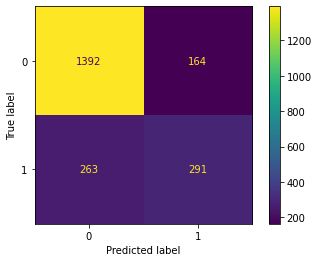

In [19]:
#fit the logistci regression model with no penalty and no class-weight and no standard scaler
model_lr = LogisticRegression(penalty="l2", C = 1, solver="liblinear").fit(Xtrain,ytrain)
print(f"Intercept {model_lr.intercept_} \n Parameters:{model_lr.coef_}")

#predictions
ypred_lr = model_lr.predict(Xtest)
print(ypred_lr)
yprob_lr = model_lr.predict_proba(Xtest)
#use mse to estimate performance

cp_lr = compute_performance(ytest,ypred_lr,model_lr.classes_)
#print(compute_performance(ytest,ypred_lr,model_lr.classes_))
conf_lr = confusion_matrix(ytest,ypred_lr)
ConfusionMatrixDisplay(conf_lr).plot()

print(classification_report(ytest,ypred_lr))


fpr_lr, tpr_lr, _ = roc_curve(ytest, yprob_lr[:,1], pos_label=1)
auc_lr = np.round(roc_auc_score(y_true = ytest, y_score = yprob_lr[:,1]), decimals = 3)


[0 0 0 ... 0 0 0]
tp: 294 tn: 1393 fp: 163 fn: 260
Accuracy: 0.8 Recall: 0.531 Precision: 0.643 Sensitivity: 0.531 Specificity: 0.895 f1-score: 0.582
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1556
           1       0.64      0.53      0.58       554

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



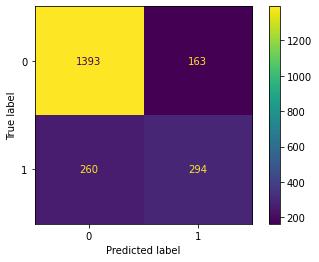

In [20]:
#LR model with scaler and without class weight no penalty
lr_s = Pipeline([
    ('scl_s', StandardScaler()),
    ('logr_s', LogisticRegression(penalty="l2", C = 1, solver="liblinear"))
])

#print(f"Intercept {lr_s.intercept_} \n Parameters:{lr_s.coef_}")

#predictions
ypred_lr_s = lr_s.fit(Xtrain,ytrain).predict(Xtest)
print(ypred_lr_s)
yprob_lr_s = lr_s.predict_proba(Xtest)
cp_lr_s = compute_performance(ytest,ypred_lr_s,lr_s.classes_)
#print(compute_performance(ytest,ypred_lr_s,lr_s.classes_))
conf_lr_s = confusion_matrix(ytest,ypred_lr_s)
ConfusionMatrixDisplay(conf_lr_s).plot()

print(classification_report(ytest,ypred_lr_s))

fpr_lr_s, tpr_lr_s, _ = roc_curve(ytest, yprob_lr_s[:,1], pos_label=1)
auc_lr_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_lr_s[:,1]), decimals = 3)

Intercept [-0.00425102] 
 Parameters:[[ 4.42995387e-01 -5.78743554e-02  3.86739011e-03  3.03606167e-04
   3.65200463e-03  1.80077466e-03 -6.96471909e-03 -1.32314864e-02
   6.04447678e-04  2.57287072e-05 -1.22933023e-02  8.04227829e-03
  -1.78513839e-01  1.74262815e-01  9.52484425e-02 -9.94994664e-02
  -1.92073493e-01  1.63051881e-01  2.47705878e-02 -2.37099038e-01
   2.94987216e-01 -6.21392015e-02  2.07864847e-01 -6.21392015e-02
  -1.49976670e-01  1.61828740e-01 -6.21392015e-02 -1.03940562e-01
  -4.65328257e-03 -6.21392015e-02  6.25414601e-02  1.34795364e-01
  -6.21392015e-02 -7.69071861e-02 -4.67469524e-02 -6.21392015e-02
   1.04635130e-01  1.16009535e-01 -6.21392015e-02 -5.81213579e-02
   1.63051881e-01 -1.67302905e-01  7.39745845e-01 -9.90099084e-04
  -7.43006770e-01 -2.12606824e-01  2.08355800e-01 -1.23288072e-03
  -2.13242802e-01  3.21620473e-01 -1.11395814e-01  1.30036370e-01
  -1.34287394e-01  7.26561621e-02 -7.69071861e-02 -2.46951724e-01
   2.42700700e-01  2.49526428e-02 -2.92

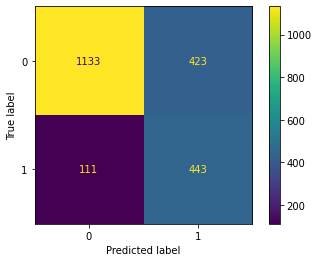

In [21]:
#LR model with class weight but without scaler
lr_w = LogisticRegression(penalty="l2", C = 1, solver="liblinear", class_weight='balanced')
lr_w.fit(Xtrain,ytrain)
print(f"Intercept {lr_w.intercept_} \n Parameters:{lr_w.coef_}")

#predictions
ypred_lr_w = lr_w.predict(Xtest)
print(ypred_lr_w)
yprob_lr_w = lr_w.predict_proba(Xtest)
cp_lr_w = compute_performance(ytest,ypred_lr_w,lr_w.classes_)
#print(compute_performance(ytest,ypred_lr_w,lr_w.classes_))
conf_lr_w = confusion_matrix(ytest,ypred_lr_w)
ConfusionMatrixDisplay(conf_lr_w).plot()
fpr_lr_w, tpr_lr_w, _ = roc_curve(ytest, yprob_lr_w[:,1], pos_label=1)
auc_lr_w = np.round(roc_auc_score(y_true = ytest, y_score = yprob_lr_w[:,1]), decimals = 3)

[0 0 0 ... 1 0 0]
tp: 441 tn: 1132 fp: 424 fn: 113
Accuracy: 0.745 Recall: 0.796 Precision: 0.51 Sensitivity: 0.796 Specificity: 0.728 f1-score: 0.622
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1556
           1       0.51      0.80      0.62       554

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.75      0.76      2110



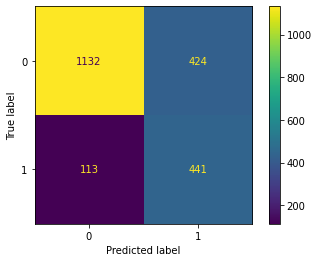

In [22]:
#LR model with class weight and with scaler
M4 = Pipeline([
    ('scl4', StandardScaler()),
    ('logr4', LogisticRegression(penalty="l2", C = 1, solver="liblinear", class_weight='balanced'))
])

#print(f"Intercept {M4.intercept_} \n Parameters:{M4.coef_}")

#predictions
ypred_lr_sw = M4.fit(Xtrain,ytrain).predict(Xtest)
print(ypred_lr_sw)
yprob_lr_sw = M4.predict_proba(Xtest)
cp_lr_sw = compute_performance(ytest,ypred_lr_sw,M4.classes_)
#print(compute_performance(ytest,ypred_lr_sw,M4.classes_))
conf_lr_sw = confusion_matrix(ytest,ypred_lr_sw)
ConfusionMatrixDisplay(conf_lr_sw).plot()

print(classification_report(ytest,ypred_lr_sw))

fpr_lr_sw, tpr_lr_sw, _ = roc_curve(ytest, yprob_lr_sw[:,1], pos_label=1)
auc_lr_sw = np.round(roc_auc_score(y_true = ytest, y_score = yprob_lr_sw[:,1]), decimals = 3)



# RF model

In [23]:
# grid search RF for best parameters
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, n_jobs=-1, random_state=0)

model_params = {'n_estimators': [300, 500, 1000],
                'max_depth':[1, 5, 10, 25,None]
}

# set up grid search meta-estimator
rf_g1 = GridSearchCV(rf, model_params, cv=10,n_jobs=-1)

# train the grid search meta-estimator to find the best model
rf_g1.fit(Xtrain, ytrain)

display(rf_g1.cv_results_)
display(rf_g1.best_params_)

{'mean_fit_time': array([ 2.12831995,  4.27435763,  8.1787329 ,  3.47071352,  6.23358202,
        11.92200727,  5.11496196,  7.82719855, 16.01141133,  4.55818102,
         6.49906127, 14.13547893,  4.65833149,  7.04707515, 16.62254791]),
 'std_fit_time': array([0.27820857, 0.84295601, 0.80921127, 0.21990984, 0.54312836,
        0.4775403 , 0.40218462, 0.3819079 , 1.269859  , 0.30423921,
        0.36779023, 1.31121085, 0.21036819, 0.35952758, 2.67416019]),
 'mean_score_time': array([0.16333444, 0.26846082, 0.56282952, 0.15597835, 0.26396465,
        0.57178001, 0.16893137, 0.25459089, 0.55133548, 0.14350805,
        0.21447494, 0.51498408, 0.14191365, 0.24015262, 0.52698436]),
 'std_score_time': array([0.03501035, 0.03337254, 0.04992362, 0.02239561, 0.05161465,
        0.12112669, 0.03344456, 0.03735633, 0.13484602, 0.0218147 ,
        0.02212053, 0.11630196, 0.01229717, 0.04787242, 0.11464874]),
 'param_max_depth': masked_array(data=[1, 1, 1, 5, 5, 5, 10, 10, 10, 25, 25, 25, None, None

{'max_depth': 10, 'n_estimators': 300}

array([[0.71419312, 0.28580688],
       [0.90944579, 0.09055421],
       [0.75021894, 0.24978106],
       ...,
       [0.85134964, 0.14865036],
       [0.98978008, 0.01021992],
       [0.98847458, 0.01152542]])

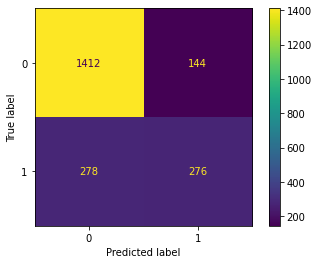

tp: 276 tn: 1412 fp: 144 fn: 278
Accuracy: 0.8 Recall: 0.498 Precision: 0.657 Sensitivity: 0.498 Specificity: 0.907 f1-score: 0.567


In [24]:
rf_best = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, n_jobs=-1, random_state=0)
rf_best.fit(Xtrain,ytrain)
ypr_rf = rf_best.predict(Xtest)
yprob_rf = rf_best.predict_proba(Xtest)

display(yprob_rf)
conf_rf = confusion_matrix(ytest,ypr_rf)
ConfusionMatrixDisplay(conf_rf).plot()
plt.show()

# Calculate the ROC curve points
fpr_rf, tpr_rf, _ = roc_curve(ytest, yprob_rf[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf = np.round(roc_auc_score(y_true = ytest, y_score = yprob_rf[:,1]), decimals = 3)

cp_rf = compute_performance(ytest,ypr_rf,rf_best.classes_)
#print(compute_performance(ytest,ypr_rf,rf.classes_))


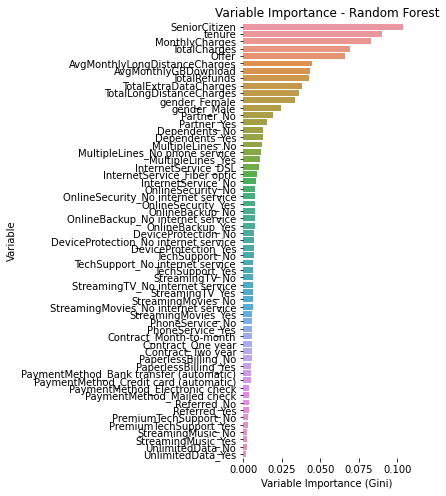

In [25]:
# Plot variable importance
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - Random Forest")
ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)
plt.show()

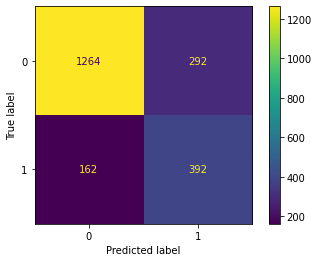

tp: 392 tn: 1264 fp: 292 fn: 162
Accuracy: 0.785 Recall: 0.708 Precision: 0.573 Sensitivity: 0.708 Specificity: 0.812 f1-score: 0.633


In [26]:
#RF with class weight but without scaler
rf_w = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, n_jobs=-1, random_state=0,class_weight="balanced")
rf_w.fit(Xtrain,ytrain)
ypr_rf_w = rf_w.predict(Xtest)
yprob_rf_w = rf_w.predict_proba(Xtest)

conf_rf_w = confusion_matrix(ytest,ypr_rf_w)
ConfusionMatrixDisplay(conf_rf_w).plot()
plt.show()

# Calculate the ROC curve points
fpr_rf_w, tpr_rf_w, _ = roc_curve(ytest, yprob_rf_w[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf_w = np.round(roc_auc_score(y_true = ytest, y_score = yprob_rf_w[:,1]), decimals = 3)

cp_rf_w = compute_performance(ytest,ypr_rf_w,rf_w.classes_)
#print(compute_performance(ytest,ypr_rf_w,rf_w.classes_))


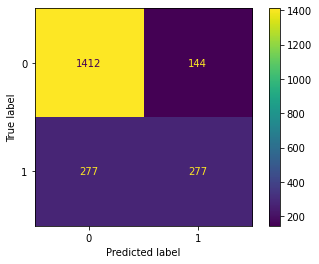

tp: 277 tn: 1412 fp: 144 fn: 277
Accuracy: 0.8 Recall: 0.5 Precision: 0.658 Sensitivity: 0.5 Specificity: 0.907 f1-score: 0.568
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1556
           1       0.66      0.50      0.57       554

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [27]:
#RF with scaler without class weight
M_rf_s = Pipeline([
    ('scl5', StandardScaler()),
    ('rf5', RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, n_jobs=-1, random_state=0))
])

ypr_rf_s = M_rf_s.fit(Xtrain,ytrain).predict(Xtest)
yprob_rf_s = M_rf_s.predict_proba(Xtest)

conf_rf_s = confusion_matrix(ytest,ypr_rf_s)
ConfusionMatrixDisplay(conf_rf_s).plot()
plt.show()

# Calculate the ROC curve points
fpr_rf_s, tpr_rf_s, _ = roc_curve(ytest, yprob_rf_s[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_rf_s[:,1]), decimals = 3)

cp_rf_s = compute_performance(ytest,ypr_rf_s,M_rf_s.classes_)
#print(compute_performance(ytest,ypr_rf_s,M_rf_s.classes_))

print(classification_report(ytest,ypr_rf_s))


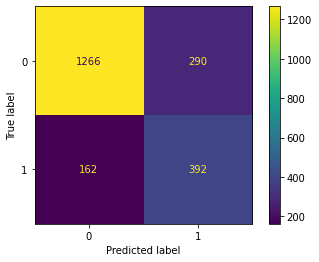

tp: 392 tn: 1266 fp: 290 fn: 162
Accuracy: 0.786 Recall: 0.708 Precision: 0.575 Sensitivity: 0.708 Specificity: 0.814 f1-score: 0.634
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1556
           1       0.57      0.71      0.63       554

    accuracy                           0.79      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.79      0.79      2110



In [28]:
M_rf_sw = Pipeline([
    ('scl6', StandardScaler()),
    ('rf6', RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, n_jobs=-1, random_state=0,class_weight="balanced"))
])

ypr_rf_sw = M_rf_sw.fit(Xtrain,ytrain).predict(Xtest)
yprob_rf_sw = M_rf_sw.predict_proba(Xtest)

conf_rf_sw = confusion_matrix(ytest,ypr_rf_sw)
ConfusionMatrixDisplay(conf_rf_sw).plot()
plt.show()

# Calculate the ROC curve points
fpr_rf_sw, tpr_rf_sw, _ = roc_curve(ytest, yprob_rf_sw[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf_sw = np.round(roc_auc_score(y_true = ytest, y_score = yprob_rf_sw[:,1]), decimals = 3)

cp_rf_sw = compute_performance(ytest,ypr_rf_sw,M_rf_sw.classes_)
#print(compute_performance(ytest,ypr_rf_sw,M_rf_s.classes_))

print(classification_report(ytest,ypr_rf_sw))

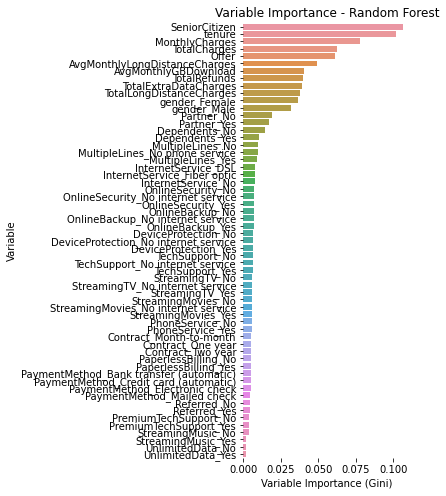

In [29]:
# Plot variable importance

importances =  M_rf_sw.named_steps["rf6"].feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - Random Forest")
ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)
plt.show()

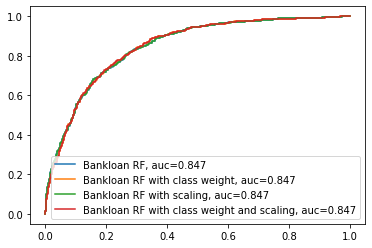

In [30]:
# Create and show the plot
plt.plot(fpr_rf,tpr_rf,label=f"Bankloan RF, auc={auc_rf}")
plt.plot(fpr_rf_w,tpr_rf_w,label=f"Bankloan RF with class weight, auc={auc_rf_w}")
plt.plot(fpr_rf_s,tpr_rf_s,label=f"Bankloan RF with scaling, auc={auc_rf_s}")
plt.plot(fpr_rf_sw,tpr_rf_sw,label=f"Bankloan RF with class weight and scaling, auc={auc_rf_sw}")
plt.legend(loc=4)
plt.show()

# XGB model

In [31]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
gb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, booster='gbtree', gamma=0.001, random_state=0)
# For XGBoost it's important to tune the number of trees (n_estimators) as it easily overfits
param_grid = dict({'n_estimators': [25, 50, 100],'max_depth': [2, 3, 4],'learning_rate' : [0.01, 0.05, 0.1]})

grid = GridSearchCV(gb, param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, refit = False)
grid.fit(Xtrain,ytrain)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=0.001,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=

In [32]:
# Show the best params
display(grid.cv_results_)
display(grid.best_params_)


{'mean_fit_time': array([0.56519418, 1.15184391, 2.38774569, 0.81036673, 1.94952168,
        3.43690083, 1.27719245, 1.75484891, 3.28814316, 0.42090285,
        0.81968832, 2.11855347, 0.68029473, 1.1695863 , 2.31230068,
        0.81319292, 1.60603621, 3.06390572, 0.41912048, 0.88507874,
        1.76745687, 0.62558513, 1.20759399, 2.48090441, 0.8261178 ,
        1.51239011, 3.74042327]),
 'std_fit_time': array([0.01450957, 0.16076701, 0.18397088, 0.04602356, 0.13362903,
        0.31909391, 0.14686279, 0.026674  , 0.03647384, 0.01200375,
        0.01994421, 0.218065  , 0.04024172, 0.01008722, 0.05989442,
        0.03733665, 0.03173052, 0.08030707, 0.01483041, 0.07662747,
        0.07569111, 0.0137452 , 0.01846249, 0.03428394, 0.06975091,
        0.01080509, 0.56903739]),
 'mean_score_time': array([0.09435234, 0.01599357, 0.01395359, 0.01081784, 0.01279604,
        0.01246414, 0.01620915, 0.01152318, 0.0099967 , 0.00927784,
        0.00901618, 0.01248696, 0.00934663, 0.01069686, 0.009167

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:09:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


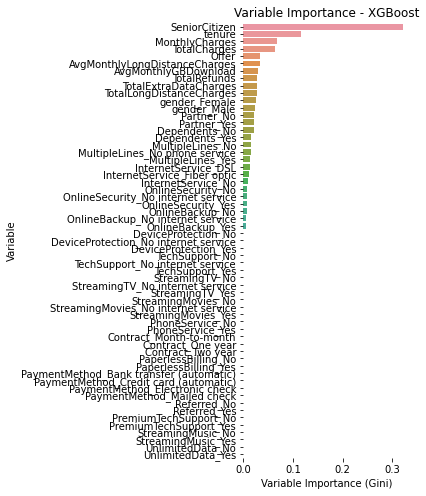

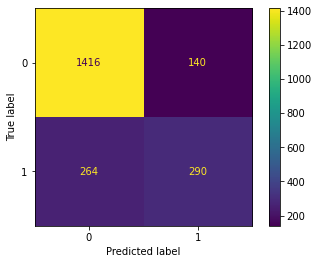

tp: 290 tn: 1416 fp: 140 fn: 264
Accuracy: 0.809 Recall: 0.523 Precision: 0.674 Sensitivity: 0.523 Specificity: 0.91 f1-score: 0.589


In [33]:
# Create XGB with best parameters.
gbF = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, booster='gbtree', gamma=0.001, random_state=0)
# Train and test
gbF.fit(Xtrain, ytrain)
ypr_xgb = gbF.predict(Xtest)
yprob_xgb = gbF.predict_proba(Xtest)

# Plot variable importance
importances = gbF.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - XGBoost")
ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)
plt.show()

# Plot confusion and ROC, compare with RF
conf_xgb = confusion_matrix(ytest,ypr_xgb)
ConfusionMatrixDisplay(conf_xgb).plot()
plt.show()

# Calculate the ROC curve points
fpr_xgb, tpr_xgb, _ = roc_curve(ytest, yprob_xgb[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_xgb = np.round(roc_auc_score(y_true = ytest, y_score = yprob_xgb[:,1]), decimals = 3)

cp_xgb = compute_performance(ytest,ypr_xgb,gbF.classes_)
#print(compute_performance(ytest,ypr_xgb,gbF.classes_))


[12:09:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


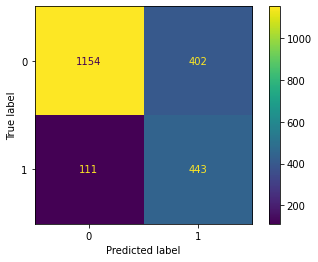

tp: 443 tn: 1154 fp: 402 fn: 111
Accuracy: 0.757 Recall: 0.8 Precision: 0.524 Sensitivity: 0.8 Specificity: 0.742 f1-score: 0.633


In [34]:
# XGB model with class weight
from sklearn.utils.class_weight import compute_sample_weight
gbF_w = gbF.fit(Xtrain, ytrain, sample_weight=compute_sample_weight("balanced", ytrain))

ypr_xgb_w = gbF_w.predict(Xtest)
yprob_xgb_w = gbF_w.predict_proba(Xtest)

# Plot confusion and ROC, compare with RF
conf_xgb_w = confusion_matrix(ytest,ypr_xgb_w)
ConfusionMatrixDisplay(conf_xgb_w).plot()
plt.show()

# Calculate the ROC curve points
fpr_xgb_w, tpr_xgb_w, _ = roc_curve(ytest, yprob_xgb_w[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_xgb_w = np.round(roc_auc_score(y_true = ytest, y_score = yprob_xgb_w[:,1]), decimals = 3)

cp_xgb_w = compute_performance(ytest,ypr_xgb_w,gbF_w.classes_)
#print(compute_performance(ytest,ypr_xgb_w,gbF_w.classes_))


[12:10:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


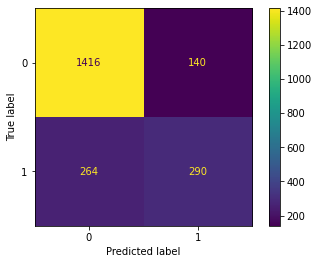

tp: 290 tn: 1416 fp: 140 fn: 264
Accuracy: 0.809 Recall: 0.523 Precision: 0.674 Sensitivity: 0.523 Specificity: 0.91 f1-score: 0.589


In [35]:
# XGB model with scaling

M_xgb_s = Pipeline([
    ('scl7', StandardScaler()),
    ('xgb2',XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=50,booster='gbtree',gamma=0.001, random_state=0,n_jobs=-1))
])

#predictions
ypr_xgb_s = M_xgb_s.fit(Xtrain,ytrain).predict(Xtest)
yprob_xgb_s = M_xgb_s.predict_proba(Xtest)

conf_xgb_s = confusion_matrix(ytest,ypr_xgb_s)
ConfusionMatrixDisplay(conf_xgb_s).plot()
plt.show()

# Calculate the ROC curve points
fpr_xgb_s, tpr_xgb_s, _ = roc_curve(ytest, yprob_xgb_s[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_xgb_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_xgb_s[:,1]), decimals = 3)

cp_xgb_s = compute_performance(ytest,ypr_xgb_s,M_xgb_s.classes_)
#print(compute_performance(ytest,ypr_xgb_s,M_xgb_s.classes_))

[12:10:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


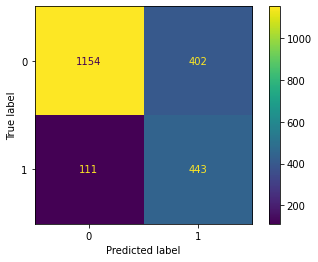

tp: 443 tn: 1154 fp: 402 fn: 111
Accuracy: 0.757 Recall: 0.8 Precision: 0.524 Sensitivity: 0.8 Specificity: 0.742 f1-score: 0.633


In [36]:
# XGB model with scaling and class weight
M_xgb_sw = Pipeline([
    ('scl8', StandardScaler()),
    ('xgb2',XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, booster='gbtree', gamma=0.001, random_state=0,n_jobs=-1))
])

#predictions


ypr_xgb_sw = M_xgb_sw.fit(Xtrain,ytrain,xgb2__sample_weight=compute_sample_weight("balanced", ytrain)).predict(Xtest)
yprob_xgb_sw = M_xgb_sw.predict_proba(Xtest)

conf_xgb_sw = confusion_matrix(ytest,ypr_xgb_sw)
ConfusionMatrixDisplay(conf_xgb_sw).plot()
plt.show()

# Calculate the ROC curve points
fpr_xgb_sw, tpr_xgb_sw, _ = roc_curve(ytest, yprob_xgb_sw[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_xgb_sw = np.round(roc_auc_score(y_true = ytest, y_score = yprob_xgb_sw[:,1]), decimals = 3)

cp_xgb_sw = compute_performance(ytest,ypr_xgb_sw,M_xgb_sw.classes_)
#print(compute_performance(ytest,ypr_xgb_sw,M_xgb_sw.classes_))


# KNN model

In [37]:
# grid search for KNN model
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 31, p= 1, weights= 'distance')

from sklearn.model_selection import GridSearchCV
k_range = list(range(10, 50))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(Xtrain, ytrain)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7801217038539553
{'n_neighbors': 46}
KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=46, p=1,
                     weights='distance')


{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 46, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[1429  127]
 [ 329  225]]
Accuracy Score:  0.7838862559241706


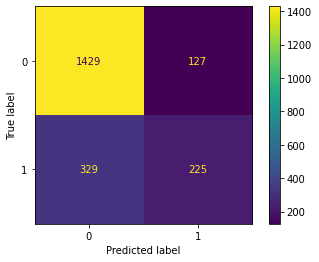

tp: 225 tn: 1429 fp: 127 fn: 329
Accuracy: 0.784 Recall: 0.406 Precision: 0.639 Sensitivity: 0.406 Specificity: 0.918 f1-score: 0.497


In [38]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 46, p= 1, weights= 'distance')
model_KNN.fit(Xtrain, ytrain)
print(model_KNN.get_params())
y_pred_knn = list(map(round, model_KNN.predict(Xtest)))
yprob_knn = model_KNN.predict_proba(Xtest)
arr = np.c_[y_pred_knn, ytest]
print('\nPrinting predicted and actual values:\n',arr)
print('Confusion Matrix \n',confusion_matrix(ytest, y_pred_knn))
print('Accuracy Score: ',accuracy_score(ytest, y_pred_knn))

# Calculate the ROC curve points
fpr_knn, tpr_knn, _ = roc_curve(ytest, yprob_knn[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_knn = np.round(roc_auc_score(y_true = ytest, y_score = yprob_knn[:,1]), decimals = 3)

conf_knn = confusion_matrix(ytest,y_pred_knn)
ConfusionMatrixDisplay(conf_knn).plot()
plt.show()

cp_knn = compute_performance(ytest,y_pred_knn,model_KNN.classes_)
#print(compute_performance(ytest,y_pred_knn,model_KNN.classes_))


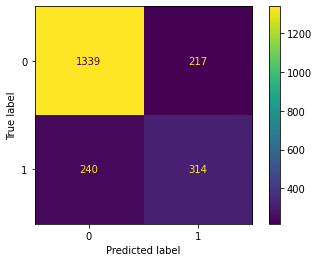

tp: 314 tn: 1339 fp: 217 fn: 240
Accuracy: 0.783 Recall: 0.567 Precision: 0.591 Sensitivity: 0.567 Specificity: 0.861 f1-score: 0.579


In [39]:
# KNN model with scaling
M_KNN_s = Pipeline([
    ('scl8', StandardScaler()),
    ('knn1', KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 46, p= 1, weights= 'distance'))
])

ypr_knn_s = M_KNN_s.fit(Xtrain,ytrain).predict(Xtest)
yprob_knn_s = M_KNN_s.predict_proba(Xtest)

conf_knn_s = confusion_matrix(ytest,ypr_knn_s)
ConfusionMatrixDisplay(conf_knn_s).plot()
plt.show()

# Calculate the ROC curve points
fpr_knn_s, tpr_knn_s, _ = roc_curve(ytest, yprob_knn_s[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_knn_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_knn_s[:,1]), decimals = 3)

cp_knn_s = compute_performance(ytest,ypr_knn_s,M_KNN_s.classes_)
#print(compute_performance(ytest,ypr_knn_s,M_KNN_s.classes_))

{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 46, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[1074  482]
 [ 145  409]]
Accuracy Score:  0.7028436018957346


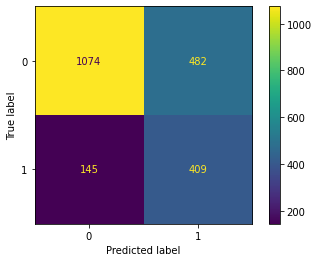

tp: 409 tn: 1074 fp: 482 fn: 145
Accuracy: 0.703 Recall: 0.738 Precision: 0.459 Sensitivity: 0.738 Specificity: 0.69 f1-score: 0.566


In [40]:
#KNN model with weight
model_KNN_w = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 46, p= 1, weights= 'distance')
model_KNN_w.fit(Xtrain_sampled, ytrain_sampled)
print(model_KNN_w.get_params())
y_pred_knn_w = list(map(round, model_KNN_w.predict(Xtest_sampled)))
yprob_knn_w = model_KNN_w.predict_proba(Xtest_sampled)
arr_knn_w = np.c_[y_pred_knn_w, ytest_sampled]
print('\nPrinting predicted and actual values:\n',arr_knn_w)
print('Confusion Matrix \n',confusion_matrix(ytest_sampled, y_pred_knn_w))
print('Accuracy Score: ',accuracy_score(ytest_sampled, y_pred_knn_w))

# Calculate the ROC curve points
fpr_knn_w, tpr_knn_w, _ = roc_curve(ytest_sampled, yprob_knn_w[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_knn_w = np.round(roc_auc_score(y_true = ytest_sampled, y_score = yprob_knn_w[:,1]), decimals = 3)

conf_knn_w = confusion_matrix(ytest_sampled,y_pred_knn_w)
ConfusionMatrixDisplay(conf_knn_w).plot()
plt.show()

cp_knn_w = compute_performance(ytest_sampled,y_pred_knn_w,model_KNN_w.classes_)
#print(compute_performance(ytest,y_pred_knn_w,model_KNN_w.classes_))

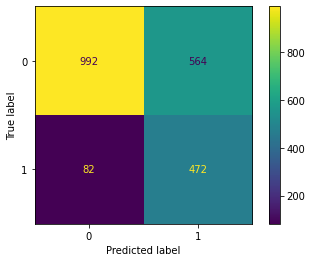

tp: 472 tn: 992 fp: 564 fn: 82
Accuracy: 0.694 Recall: 0.852 Precision: 0.456 Sensitivity: 0.852 Specificity: 0.638 f1-score: 0.594


In [41]:
#KNN model with weight and with scaling
M_KNN_sw = Pipeline([
    ('scl9', StandardScaler()),
    ('knn2', KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 46, p= 1, weights= 'distance'))
])

ypr_knn_sw = M_KNN_sw.fit(Xtrain_sampled,ytrain_sampled).predict(Xtest_sampled)
yprob_knn_sw = M_KNN_sw.predict_proba(Xtest_sampled)

conf_knn_sw = confusion_matrix(ytest_sampled,ypr_knn_sw)
ConfusionMatrixDisplay(conf_knn_sw).plot()
plt.show()

# Calculate the ROC curve points
fpr_knn_sw, tpr_knn_sw, _ = roc_curve(ytest_sampled, yprob_knn_sw[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_knn_sw = np.round(roc_auc_score(y_true = ytest_sampled, y_score = yprob_knn_sw[:,1]), decimals = 3)

cp_knn_sw = compute_performance(ytest_sampled,ypr_knn_sw,M_KNN_sw.classes_)
#print(compute_performance(ytest,ypr_knn_sw,M_KNN_sw.classes_))

# Model with ADAboost

In [42]:
#grid search for ADAboost
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100,random_state=0)
param_grid = dict({'n_estimators': [100,300,500,1000],'learning_rate' : [0.01, 0.05, 0.1]})
gr_ada = GridSearchCV(model_ada, param_grid, cv = 10,n_jobs = -1, refit = False)
gr_ada.fit(Xtrain,ytrain)

display(gr_ada.cv_results_)
display(gr_ada.best_params_)

{'mean_fit_time': array([ 1.42595427,  4.21102629,  6.77397542, 14.74324222,  1.57952716,
         4.98528788,  8.18551698, 13.631248  ,  1.44272242,  4.0772125 ,
         6.6012969 , 12.99064584]),
 'std_fit_time': array([0.11942273, 0.04527437, 0.21473024, 1.19656218, 0.13448948,
        0.07747875, 0.67560081, 0.28090316, 0.16014854, 0.13627635,
        0.04234859, 0.59388548]),
 'mean_score_time': array([0.06485946, 0.17208998, 0.29040902, 0.58969324, 0.07242396,
        0.21303599, 0.31845253, 0.58383496, 0.06610403, 0.16637621,
        0.26646461, 0.52168767]),
 'std_score_time': array([0.00623542, 0.00737136, 0.02003969, 0.06737842, 0.0130265 ,
        0.02254031, 0.05037886, 0.11058116, 0.01704403, 0.01103652,
        0.00583406, 0.12601097]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05, 0.1,
                    0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fal

{'learning_rate': 0.05, 'n_estimators': 500}

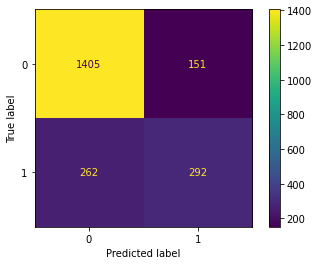

tp: 292 tn: 1405 fp: 151 fn: 262
Accuracy: 0.804 Recall: 0.527 Precision: 0.659 Sensitivity: 0.527 Specificity: 0.903 f1-score: 0.586


In [43]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(learning_rate=0.05, n_estimators=500,random_state=0)

ypred_ada = model_ada.fit(Xtrain,ytrain).predict(Xtest)

yprob_ada = model_ada.predict_proba(Xtest)


conf_ada = confusion_matrix(ytest,ypred_ada)
ConfusionMatrixDisplay(conf_ada).plot()
plt.show()

# Calculate the ROC curve points
fpr_ada, tpr_ada, _ = roc_curve(ytest, yprob_ada[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_ada = np.round(roc_auc_score(y_true = ytest, y_score = yprob_ada[:,1]), decimals = 3)

cp_ada = compute_performance(ytest,ypred_ada,model_ada.classes_)

#print(compute_performance(ytest,ypred_ada,model_ada.classes_))


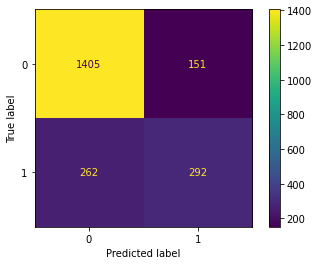

tp: 292 tn: 1405 fp: 151 fn: 262
Accuracy: 0.804 Recall: 0.527 Precision: 0.659 Sensitivity: 0.527 Specificity: 0.903 f1-score: 0.586
0.846


In [44]:
#ADAboost without weight with scale
M_ada_s = Pipeline([
    ('scl6', StandardScaler()),
    ('ada6', AdaBoostClassifier(learning_rate=0.05, n_estimators=500,random_state=0))
])

ypr_ada_s = M_ada_s.fit(Xtrain,ytrain).predict(Xtest)
yprob_ada_s = M_ada_s.predict_proba(Xtest)

conf_ada_s = confusion_matrix(ytest,ypr_ada_s)
ConfusionMatrixDisplay(conf_ada_s).plot()
plt.show()

# Calculate the ROC curve points
fpr_ada_s, tpr_ada_s, _ = roc_curve(ytest, yprob_ada_s[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_ada_s = np.round(roc_auc_score(y_true = ytest, y_score = yprob_ada_s[:,1]), decimals = 3)

cp_ada_s = compute_performance(ytest,ypr_ada_s,M_ada_s.classes_)

#print(compute_performance(ytest,ypr_ada_s,M_ada_s.classes_))

print(auc_ada_s)


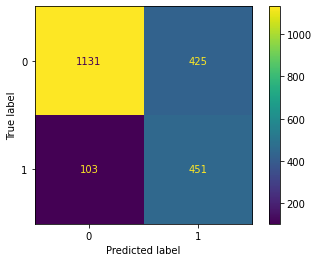

tp: 451 tn: 1131 fp: 425 fn: 103
Accuracy: 0.75 Recall: 0.814 Precision: 0.515 Sensitivity: 0.814 Specificity: 0.727 f1-score: 0.631


In [45]:
#ada model with class weight
model_ada_w = AdaBoostClassifier(learning_rate=0.05, n_estimators=500,random_state=0)

ypred_ada_w = model_ada.fit(Xtrain_sampled,ytrain_sampled).predict(Xtest_sampled)

yprob_ada_w = model_ada.predict_proba(Xtest_sampled)


conf_ada_w = confusion_matrix(ytest_sampled,ypred_ada_w)
ConfusionMatrixDisplay(conf_ada_w).plot()
plt.show()

# Calculate the ROC curve points
fpr_ada_w, tpr_ada_w, _ = roc_curve(ytest_sampled, yprob_ada_w[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_ada_w = np.round(roc_auc_score(y_true = ytest_sampled, y_score = yprob_ada_w[:,1]), decimals = 3)

cp_ada_w = compute_performance(ytest_sampled,ypred_ada_w,model_ada.classes_)

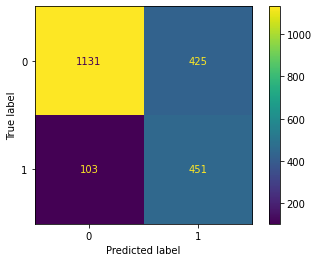

tp: 451 tn: 1131 fp: 425 fn: 103
Accuracy: 0.75 Recall: 0.814 Precision: 0.515 Sensitivity: 0.814 Specificity: 0.727 f1-score: 0.631
0.845


In [46]:
# model with scaling and weight
M_ada_sw = Pipeline([
    ('scl7', StandardScaler()),
    ('ada7', AdaBoostClassifier(learning_rate=0.05, n_estimators=500,random_state=0))
])

ypr_ada_sw = M_ada_sw.fit(Xtrain_sampled,ytrain_sampled).predict(Xtest_sampled)
yprob_ada_sw = M_ada_sw.predict_proba(Xtest_sampled)

conf_ada_sw = confusion_matrix(ytest_sampled,ypr_ada_sw)
ConfusionMatrixDisplay(conf_ada_sw).plot()
plt.show()

# Calculate the ROC curve points
fpr_ada_sw, tpr_ada_sw, _ = roc_curve(ytest_sampled, yprob_ada_sw[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_ada_sw = np.round(roc_auc_score(y_true = ytest_sampled, y_score = yprob_ada_sw[:,1]), decimals = 3)

cp_ada_sw = compute_performance(ytest_sampled,ypr_ada_sw,M_ada_sw.classes_)

#print(compute_performance(ytest,ypr_ada_sw,M_ada_sw.classes_))

print(auc_ada_sw)

# Model Comparision -Part1 without scaling and weight

[0.6028436018957346, 0.7976303317535545, 0.8, 0.8085308056872038, 0.7838862559241706, 0.8042654028436019]


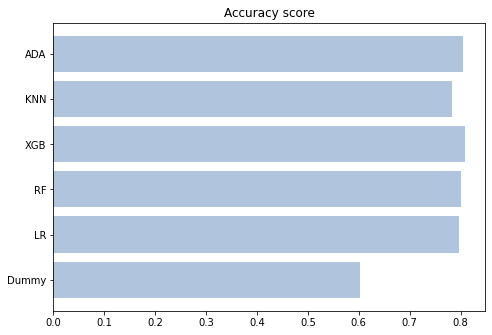

[0.2597173144876325, 0.576808721506442, 0.566735112936345, 0.589430894308943, 0.49668874172185434, 0.5857572718154463]


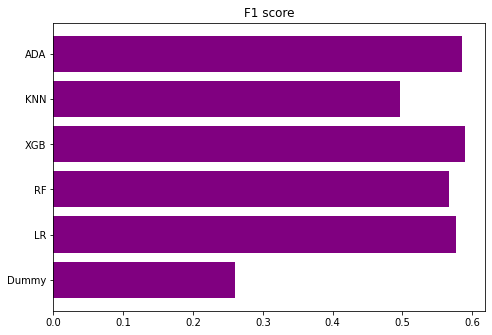

[0.25432525951557095, 0.6395604395604395, 0.6571428571428571, 0.6744186046511628, 0.6392045454545454, 0.6591422121896162]


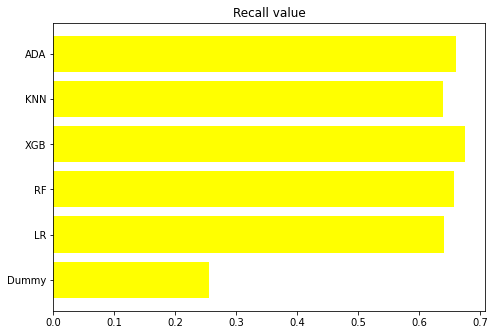

[0.492, 0.839, 0.847, 0.849, 0.786, 0.846]


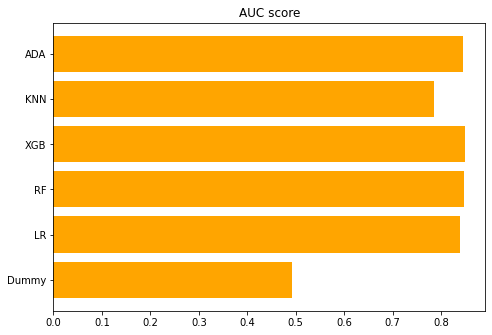

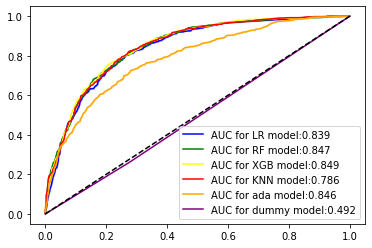

AUC for LR model:0.839| AUC for RF model:0.847| AUC for XGB model:0.849| AUC for KNN model:0.786| AUC for ada model:0.846 | AUC for dummy model:0.492


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV mean score: 0.6100529552798839 0.574149464367221 0.5934135919123777 0.48278174853512423 0.5965021612214344 0.2720608433321049


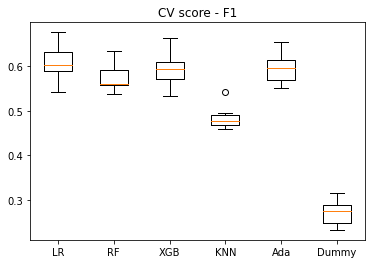

CV mean score: 0.6100529552798839 0.574149464367221 0.5934135919123777 0.48278174853512423 0.5965021612214344 0.2720608433321049


In [47]:
###### Accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
accuracy = [cp_dummy[0],cp_lr[0],cp_rf[0],cp_xgb[0],cp_knn[0],cp_ada[0]]
print(accuracy)
ax.barh(model,accuracy,color="lightsteelblue")
plt.title("Accuracy score")
plt.show()

#F1-score
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
f1score = [cp_dummy[4],cp_lr[4],cp_rf[4],cp_xgb[4],cp_knn[4],cp_ada[4]]
print(f1score)
ax.barh(model,f1score,color="purple")
plt.title("F1 score")
plt.show()

#recall value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
recall = [cp_dummy[1],cp_lr[1],cp_rf[1],cp_xgb[1],cp_knn[1],cp_ada[1]]
print(recall)
ax.barh(model,recall,color="yellow")
plt.title("Recall value")
plt.show()

#AUC value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
auc = [auc_dummy,auc_lr,auc_rf,auc_xgb,auc_knn,auc_ada]
print(auc)
ax.barh(model,auc,color="orange")
plt.title("AUC score")
plt.show()

#AUC plot
ax1 = sns.lineplot(x=fpr_lr, y=tpr_lr, color="blue")
ax2 = sns.lineplot(x=fpr_rf, y=tpr_rf, color="green")
ax3 = sns.lineplot(x=fpr_xgb, y=tpr_xgb, color="yellow")
ax4 = sns.lineplot(x=fpr_ada, y=tpr_ada, color="red")
ax5 = sns.lineplot(x=fpr_knn, y=tpr_knn, color="orange")
ax6 = sns.lineplot(x=fpr_dummy, y=tpr_dummy, color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend([f'AUC for LR model:{auc_lr}', f'AUC for RF model:{auc_rf}', f'AUC for XGB model:{auc_xgb}', f'AUC for KNN model:{auc_knn}', f'AUC for ada model:{auc_ada}',f'AUC for dummy model:{auc_dummy}'])
plt.show()

print(f"AUC for LR model:{auc_lr}| AUC for RF model:{auc_rf}| AUC for XGB model:{auc_xgb}| AUC for KNN model:{auc_knn}| AUC for ada model:{auc_ada} | AUC for dummy model:{auc_dummy}")

#cv value for each model
lr_loss = cross_val_score(model_lr, Xtrain, ytrain, cv=10, scoring='f1')
rf_loss = cross_val_score(rf, Xtrain, ytrain, cv=10, scoring='f1')
gbF_loss = cross_val_score(gbF, Xtrain, ytrain, cv=10, scoring='f1')
KNN_loss = cross_val_score(model_KNN, Xtrain, ytrain, cv=10, scoring='f1')
ada_loss = cross_val_score(model_ada, Xtrain, ytrain, cv=10, scoring='f1')
dummy_loss = cross_val_score(model_dummy, Xtrain, ytrain, cv=10, scoring='f1')

print("CV mean score:", lr_loss.mean(), rf_loss.mean(), gbF_loss.mean(), KNN_loss.mean(), ada_loss.mean(),dummy_loss.mean())
plt.boxplot([lr_loss, rf_loss, gbF_loss, KNN_loss, ada_loss,dummy_loss])
plt.xticks([1, 2, 3, 4, 5, 6], ['LR', 'RF', 'XGB', 'KNN', 'Ada','Dummy'])
plt.title("CV score - F1")
plt.show()
print("CV mean score:", lr_loss.mean(), rf_loss.mean(), gbF_loss.mean(), KNN_loss.mean(), ada_loss.mean(),dummy_loss.mean())


# Model Comparision - Part2 -with scaler without weight

[0.6028436018957346, 0.7995260663507109, 0.8004739336492891, 0.8085308056872038, 0.7834123222748816, 0.8042654028436019]


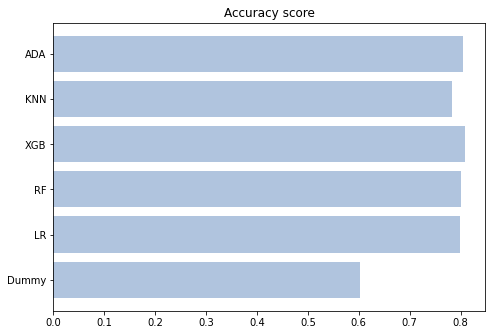

[0.24094202898550726, 0.5816023738872402, 0.5682051282051281, 0.589430894308943, 0.5788018433179722, 0.5857572718154463]


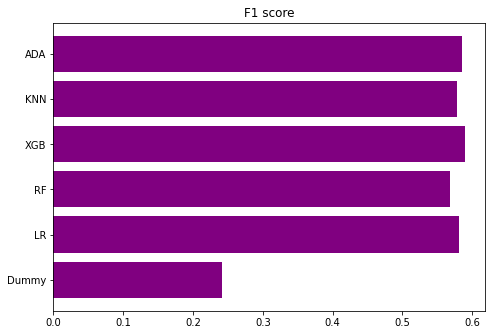

[0.24181818181818182, 0.6433260393873085, 0.6579572446555819, 0.6744186046511628, 0.591337099811676, 0.6591422121896162]


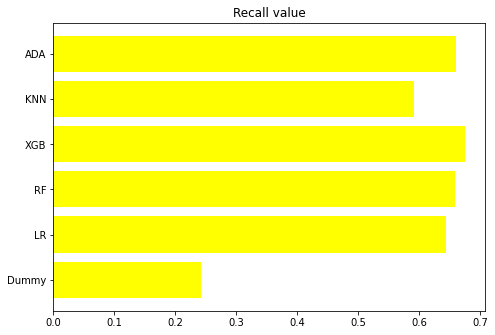

[0.501, 0.839, 0.847, 0.849, 0.825, 0.846]


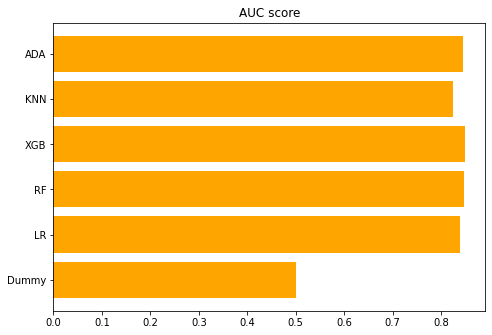

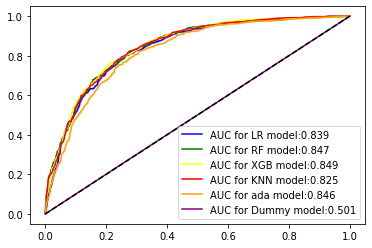

AUC for LR model:0.839| AUC for RF model:0.847| AUC for XGB model:0.849| AUC for KNN model:0.825| AUC for ada model:0.846 | AUC for Dummy model:0.501


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


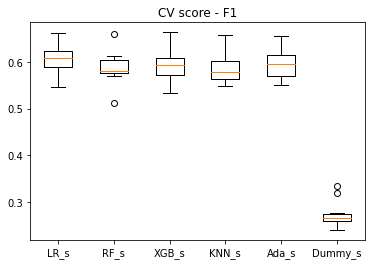

CV mean score: 0.605905883222826 0.5877529742428598 0.5934135919123777 0.5911075947352817 0.5965021612214344 0.2745226912975657


In [48]:
#Accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
accuracy = [cp_dummy_s[0],cp_lr_s[0],cp_rf_s[0],cp_xgb_s[0],cp_knn_s[0],cp_ada_s[0]]
print(accuracy)
ax.barh(model,accuracy,color="lightsteelblue")
plt.title("Accuracy score")
plt.show()

#F1-score
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
f1score = [cp_dummy_s[4],cp_lr_s[4],cp_rf_s[4],cp_xgb_s[4],cp_knn_s[4],cp_ada_s[4]]
print(f1score)
ax.barh(model,f1score,color="purple")
plt.title("F1 score")
plt.show()

#recall value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
recall = [cp_dummy_s[1],cp_lr_s[1],cp_rf_s[1],cp_xgb_s[1],cp_knn_s[1],cp_ada_s[1]]
print(recall)
ax.barh(model,recall,color="yellow")
plt.title("Recall value")
plt.show()

#AUC value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB', 'KNN','ADA']
auc = [auc_dummy_s,auc_lr_s,auc_rf_s,auc_xgb_s,auc_knn_s,auc_ada_s]
print(auc)
ax.barh(model,auc,color="orange")
plt.title("AUC score")
plt.show()

#AUC plot
ax1 = sns.lineplot(x=fpr_lr, y=tpr_lr, color="blue")
ax2 = sns.lineplot(x=fpr_rf_s, y=tpr_rf_s, color="green")
ax3 = sns.lineplot(x=fpr_xgb_s, y=tpr_xgb_s, color="yellow")
ax4 = sns.lineplot(x=fpr_ada_s, y=tpr_ada_s, color="red")
ax5 = sns.lineplot(x=fpr_knn_s, y=tpr_knn_s, color="orange")
ax6 = sns.lineplot(x=fpr_dummy_s, y=tpr_dummy_s, color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend([f'AUC for LR model:{auc_lr_s}', f'AUC for RF model:{auc_rf_s}', f'AUC for XGB model:{auc_xgb_s}', f'AUC for KNN model:{auc_knn_s}', f'AUC for ada model:{auc_ada_s}',f'AUC for Dummy model:{auc_dummy_s}'])
plt.show()

print(f"AUC for LR model:{auc_lr_s}| AUC for RF model:{auc_rf_s}| AUC for XGB model:{auc_xgb_s}| AUC for KNN model:{auc_knn_s}| AUC for ada model:{auc_ada_s} | AUC for Dummy model:{auc_dummy_s}")

#with scalar
lr_loss_s = cross_val_score(lr_s, Xtrain, ytrain, cv=10, scoring='f1')
rf_loss_s = cross_val_score(M_rf_s, Xtrain, ytrain, cv=10, scoring='f1')
KNN_loss_s = cross_val_score(M_KNN_s, Xtrain, ytrain, cv=10, scoring='f1')
gbF_loss_s = cross_val_score(M_xgb_s, Xtrain, ytrain, cv=10, scoring='f1')
ada_loss_s = cross_val_score(M_ada_s, Xtrain, ytrain, cv=10, scoring='f1')
dummy_loss_s = cross_val_score(model_dummy_s, Xtrain, ytrain, cv=10, scoring='f1')
plt.boxplot([lr_loss_s, rf_loss_s, gbF_loss_s, KNN_loss_s, ada_loss_s,dummy_loss_s])
plt.xticks([1, 2, 3, 4, 5,6], ['LR_s', 'RF_s', 'XGB_s', 'KNN_s', 'Ada_s','Dummy_s'])
plt.title("CV score - F1")
plt.show()

print("CV mean score:", lr_loss_s.mean(), rf_loss_s.mean(), gbF_loss_s.mean(), KNN_loss_s.mean(), ada_loss_s.mean(),dummy_loss_s.mean())


# Model Comparision - Part3 -with weight without scaling

[0.504739336492891, 0.7469194312796209, 0.7848341232227488, 0.7568720379146919, 0.7028436018957346, 0.7497630331753554]


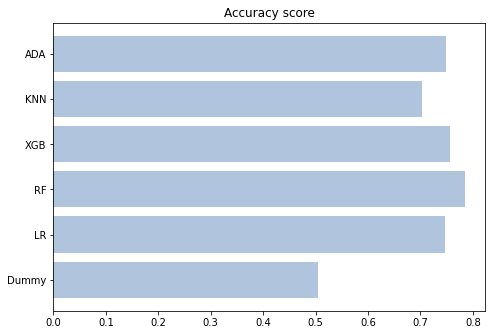

[0.34235368156073004, 0.623943661971831, 0.6332794830371566, 0.6333095067905646, 0.5660899653979239, 0.6307692307692309]


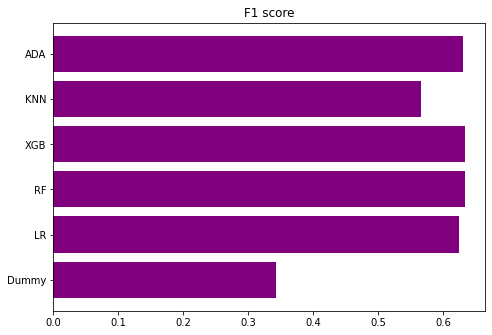

[0.26280193236714977, 0.5115473441108545, 0.5730994152046783, 0.5242603550295858, 0.4590347923681257, 0.5148401826484018]


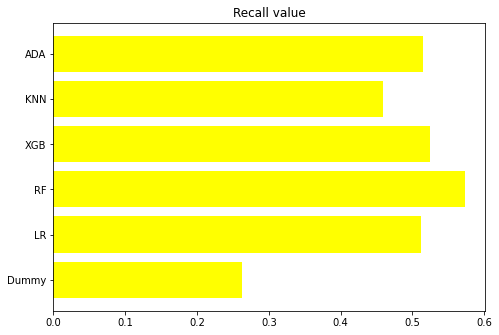

[0.508, 0.839, 0.847, 0.848, 0.781, 0.845]


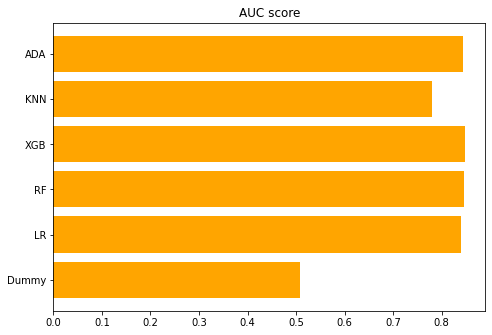

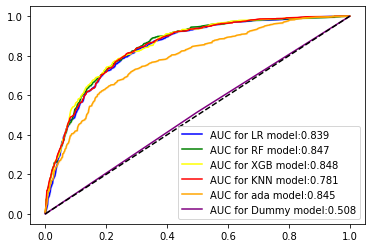

AUC for LR model:0.839| AUC for RF model:0.847| AUC for XGB model:0.848| AUC for KNN model:0.781| AUC for ada model:0.845 | AUC for Dummy model:0.508


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


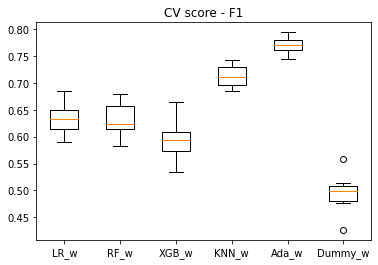

CV mean score: 0.6316403962073297 0.6329191739478854 0.5934135919123777 0.7122957069497458 0.7706223839596882 0.49528515832330394


In [49]:
#Accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
accuracy = [cp_dummy_w[0],cp_lr_w[0],cp_rf_w[0],cp_xgb_w[0],cp_knn_w[0],cp_ada_w[0]]
print(accuracy)
ax.barh(model,accuracy,color="lightsteelblue")
plt.title("Accuracy score")
plt.show()

#F1-score
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
f1score = [cp_dummy_w[4],cp_lr_w[4],cp_rf_w[4],cp_xgb_w[4],cp_knn_w[4],cp_ada_w[4]]
print(f1score)
ax.barh(model,f1score,color="purple")
plt.title("F1 score")
plt.show()

#recall value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
recall = [cp_dummy_w[1],cp_lr_w[1],cp_rf_w[1],cp_xgb_w[1],cp_knn_w[1],cp_ada_w[1]]
print(recall)
ax.barh(model,recall,color="yellow")
plt.title("Recall value")
plt.show()

#AUC value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
auc = [auc_dummy_w,auc_lr_w,auc_rf_w,auc_xgb_w,auc_knn_w,auc_ada_w]
print(auc)
ax.barh(model,auc,color="orange")
plt.title("AUC score")
plt.show()

#AUC plot
ax1 = sns.lineplot(x=fpr_lr_w, y=tpr_lr_w, color="blue")
ax2 = sns.lineplot(x=fpr_rf_w, y=tpr_rf_w, color="green")
ax3 = sns.lineplot(x=fpr_xgb_w, y=tpr_xgb_w, color="yellow")
ax4 = sns.lineplot(x=fpr_ada_w, y=tpr_ada_w, color="red")
ax5 = sns.lineplot(x=fpr_knn_w, y=tpr_knn_w, color="orange")
ax6 = sns.lineplot(x=fpr_dummy_w, y=tpr_dummy_w, color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend([f'AUC for LR model:{auc_lr_w}', f'AUC for RF model:{auc_rf_w}', f'AUC for XGB model:{auc_xgb_w}', f'AUC for KNN model:{auc_knn_w}', f'AUC for ada model:{auc_ada_w}',f'AUC for Dummy model:{auc_dummy_w}'])
plt.show()

print(f"AUC for LR model:{auc_lr_w}| AUC for RF model:{auc_rf_w}| AUC for XGB model:{auc_xgb_w}| AUC for KNN model:{auc_knn_w}| AUC for ada model:{auc_ada_w} | AUC for Dummy model:{auc_dummy_w}")

#with weight
lr_loss_w = cross_val_score(lr_w, Xtrain, ytrain, cv=10, scoring='f1')
rf_loss_w = cross_val_score(rf_w, Xtrain, ytrain, cv=10, scoring='f1')
gbF_loss_w = cross_val_score(gbF_w, Xtrain, ytrain, cv=10, scoring='f1')
KNN_loss_w = cross_val_score(model_KNN_w, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
ada_loss_w = cross_val_score(model_ada_w, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
dummy_loss_w = cross_val_score(model_dummy_w, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
plt.boxplot([lr_loss_w, rf_loss_w, gbF_loss_w, KNN_loss_w, ada_loss_w,dummy_loss_w])
plt.xticks([1, 2, 3, 4, 5, 6], ['LR_w', 'RF_w', 'XGB_w', 'KNN_w', 'Ada_w','Dummy_w'])
plt.title("CV score - F1")
plt.show()

print("CV mean score:", lr_loss_w.mean(), rf_loss_w.mean(), gbF_loss_w.mean(), KNN_loss_w.mean(), ada_loss_w.mean(),dummy_loss_w.mean())


# Model Comparision - Part4 -with scaler with weight

[0.5104265402843602, 0.7454976303317535, 0.785781990521327, 0.7568720379146919, 0.6938388625592417, 0.7497630331753554]


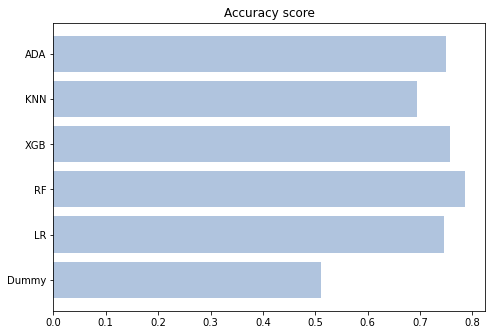

[0.35798632691112486, 0.6215644820295984, 0.6343042071197411, 0.6333095067905646, 0.5937106918238994, 0.6307692307692309]


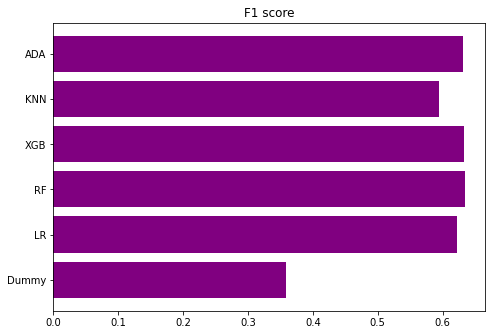

[0.2729857819905213, 0.5098265895953757, 0.5747800586510264, 0.5242603550295858, 0.4555984555984556, 0.5148401826484018]


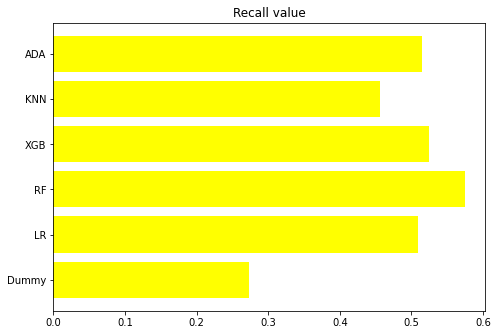

[0.488, 0.839, 0.847, 0.848, 0.821, 0.845]


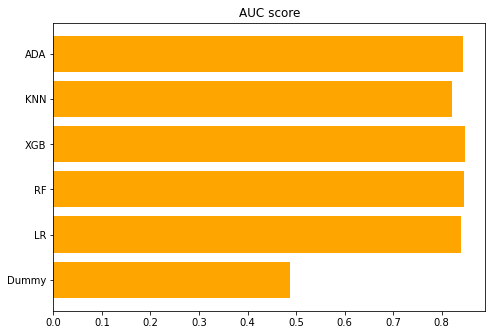

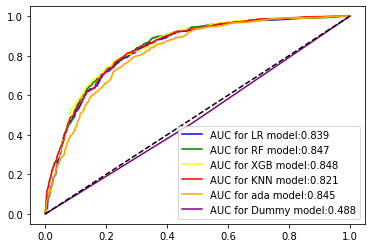

AUC for LR model:0.839| AUC for RF model:0.847| AUC for XGB model:0.848| AUC for KNN model:0.821| AUC for ada model:0.845 | AUC for Dummy model:0.488


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:21:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


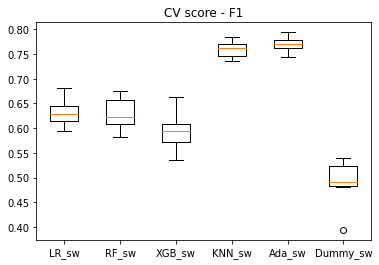

CV mean score: 0.6307492609448611 0.6315066932689276 0.5934135919123777 0.7599990490772714 0.7706223839596882 0.49430455073063156


In [50]:
#Accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
accuracy = [cp_dummy_sw[0],cp_lr_sw[0],cp_rf_sw[0],cp_xgb_sw[0],cp_knn_sw[0],cp_ada_sw[0]]
print(accuracy)
ax.barh(model,accuracy,color="lightsteelblue")
plt.title("Accuracy score")
plt.show()

#F1-score
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
f1score = [cp_dummy_sw[4],cp_lr_sw[4],cp_rf_sw[4],cp_xgb_sw[4],cp_knn_sw[4],cp_ada_sw[4]]
print(f1score)
ax.barh(model,f1score,color="purple")
plt.title("F1 score")
plt.show()

#recall value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
recall = [cp_dummy_sw[1],cp_lr_sw[1],cp_rf_sw[1],cp_xgb_sw[1],cp_knn_sw[1],cp_ada_sw[1]]
print(recall)
ax.barh(model,recall,color="yellow")
plt.title("Recall value")
plt.show()

#AUC value
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Dummy','LR', 'RF', 'XGB','KNN','ADA']
auc = [auc_dummy_sw,auc_lr_sw,auc_rf_sw,auc_xgb_sw,auc_knn_sw,auc_ada_sw]
print(auc)
ax.barh(model,auc,color="orange")
plt.title("AUC score")
plt.show()

#AUC plot
ax1 = sns.lineplot(x=fpr_lr_sw, y=tpr_lr_sw, color="blue")
ax2 = sns.lineplot(x=fpr_rf_sw, y=tpr_rf_sw, color="green")
ax3 = sns.lineplot(x=fpr_xgb_sw, y=tpr_xgb_sw, color="yellow")
ax4 = sns.lineplot(x=fpr_ada_sw, y=tpr_ada_sw, color="red")
ax5 = sns.lineplot(x=fpr_knn_sw, y=tpr_knn_sw, color="orange")
ax6 = sns.lineplot(x=fpr_dummy_sw, y=tpr_dummy_sw, color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend([f'AUC for LR model:{auc_lr_sw}', f'AUC for RF model:{auc_rf_sw}', f'AUC for XGB model:{auc_xgb_sw}', f'AUC for KNN model:{auc_knn_sw}', f'AUC for ada model:{auc_ada_sw}',f'AUC for Dummy model:{auc_dummy_sw}'])
plt.show()

print(f"AUC for LR model:{auc_lr_sw}| AUC for RF model:{auc_rf_sw}| AUC for XGB model:{auc_xgb_sw}| AUC for KNN model:{auc_knn_sw}| AUC for ada model:{auc_ada_sw} | AUC for Dummy model:{auc_dummy_sw}")

#with weight
lr_loss_sw = cross_val_score(M4, Xtrain, ytrain, cv=10, scoring='f1')
rf_loss_sw = cross_val_score(M_rf_sw, Xtrain, ytrain, cv=10, scoring='f1')
gbF_loss_sw = cross_val_score(M_xgb_sw, Xtrain, ytrain, cv=10, scoring='f1')
KNN_loss_sw = cross_val_score(M_KNN_sw, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
ada_loss_sw = cross_val_score(M_ada_sw, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
dummy_loss_sw = cross_val_score(model_dummy_sw, Xtrain_sampled, ytrain_sampled, cv=10, scoring='f1')
plt.boxplot([lr_loss_sw, rf_loss_sw, gbF_loss_sw, KNN_loss_sw, ada_loss_sw,dummy_loss_sw])
plt.xticks([1, 2, 3, 4, 5, 6], ['LR_sw', 'RF_sw', 'XGB_sw', 'KNN_sw', 'Ada_sw','Dummy_sw'])
plt.title("CV score - F1")
plt.show()

print("CV mean score:", lr_loss_sw.mean(), rf_loss_sw.mean(), gbF_loss_sw.mean(), KNN_loss_sw.mean(), ada_loss_sw.mean(),dummy_loss_sw.mean())
